# Project Brief

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding


You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

   Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    --> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    --> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    --> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
   Loan rejected:The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

<ol> <li> This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. </li>

<li> Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. </li>

<li> If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. </li>

<li>In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.</li></ol>

<h6> Importing the necessary modules  </h6>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h6>Supress scientific notation of values</h6>

In [2]:
pd.options.display.float_format = '{:.2f}'.format

<h6> Supress Warnings </h6>

In [3]:
import warnings
warnings.filterwarnings('ignore')

##### Loading data set file in to data frame.

In [4]:
file_path = 'loan.csv'
#using low memory flag to load columns with multiple data types.
data = pd.read_csv(file_path, low_memory=False)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                nan   
1   15.27%        59.83     C        C4  ...                nan   
2   15.96%        84.33     C        C5  ...                nan   
3   13.49%       339.31     C        C1  ...                nan   
4   12.69%        67.79     B        B5  ...                nan   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                nan            nan               nan                 0.00   
1                nan            nan               nan                 0.00   
2                nan            nan               nan                 0.00   
3                nan            nan               nan                 0.00   
4                nan            nan               nan                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             nan               nan            nan   
1      0.00             nan               nan            nan   
2      0.00             nan               nan            nan   
3      0.00             nan               nan            nan   
4      0.00             nan               nan            nan   

  total_il_high_credit_limit  
0                        nan  
1                        nan  
2                        nan  
3                        nan  
4                        nan  

[5 rows x 111 columns]

In [5]:
#shape of data frame
data.shape

(39717, 111)

<h4> Data Cleaning </h4>

    ---> 1. Checklist for Fixing Rows
    ---> 2. Checklist for Fixing Columns
    ---> 3. Checklist for missing values
    ---> 4. Checklist for Standardise values
    ---> 5. Checklist for Fixing invalid values
    ---> 6. Checklist for Filtering Data

Finding percentage of null or missing values

In [6]:
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 111, dtype: float64

Removing columns which has <i> more than 30% null values in it </i>.

In [7]:
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [8]:
#Finding number of unique values in each column
data.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

<b> 'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' </b> columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [9]:
#Dropping Columns with only one values.

data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 
           'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [10]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
dtype: int64

<b> emp_title, and title </b> columns have text values which are more unique values.

In [11]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

<b> id, url, and member_id</b> having all unique values which means any one of these can be used as primary key. Let's use <i>id</i> primary key and remove url and member id columns.

In [12]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

<b> total_rec_int,  total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv </b> variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed. <br> <br>
<b> recoveries, collection_recovery_fee </b> columns are only valid for charged off loans. Will removed these columns.

In [13]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 
           'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

Finding percentage of <i> null or missing values </i>

In [14]:
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

Removing the the <i>null valued rows</i> in the above columns

In [15]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

#Finding percentage of null or missing values

null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

Loan Status Column has 3 distict values out of them we need only <b>Fully Paid and Charged Off</b>. So, we will remove the rows with <i>current values</i> in loan status.

In [16]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [17]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values. Let's remove it.

Stripping <i>empty space</i> in values in term

In [18]:
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [19]:
#shape of data frame
data.shape

(36800, 31)

<h3> Data type conversions </h3>

In [20]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

<b> int_rate and revol_util </b> are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [21]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

 <b>issue_d, earliest_cr_line</b> are having date values, let convert column data type to date.

In [22]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')

#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [23]:
# Converted to proper datatypes for analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

<h5> Derived Variables </h5>

In [24]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [25]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   

   installment grade sub_grade emp_length  ... total_pymnt  total_pymnt_inv  \
0       162.87     B        B2  10+ years  ...     5863.16          5833.84   
1        59.83     C        C4   < 1 year  ...     1008.71          1008.71   
2        84.33     C        C5  10+ years  ...     3005.67          3005.67   
3       339.31     C        C1  10+ years  ...    12231.89         12231.89   
5       156.46     A        A4    3 years  ...     5632.21          5632.21   

  last_pymnt_amnt pub_rec_bankruptcies issue_d_year issue_d_month  \
0          171.62                 0.00         2011           Dec   
1          119.66                 0.00         2011           Dec   
2          649.91                 0.00         2011           Dec   
3          357.48                 0.00         2011           Dec   
5          161.03                 0.00         2011           Dec   

  issue_d_weekday earliest_cr_line_year  earliest_cr_line_month  \
0               3                  1985                     Jan   
1               3                  1999                     Apr   
2               3                  2001                     Nov   
3               3                  1996                     Feb   
5               3                  2004                     Nov   

   approved_loan_amnt_ratio  
0                     99.50  
1                    100.00  
2                    100.00  
3                    100.00  
5                    100.00  

[5 rows x 37 columns]

<h4> Count of Categorical and Numeric columns </h4>

In [26]:
numeric_data = data.select_dtypes(include = [np.number])

categorical_data = data.select_dtypes(exclude = [np.number, np.object])

string_data = data.select_dtypes(include = [np.object])

print('Observation: There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

Observation: There are 20 numerical , 2 categorical and 15 string features in the training data


<h4> Exploratory Data Analysis </h4>

    ---> 1. Univariate Analysis
    ---> 2. Segmented Analysis
    ---> 3. Bivariate Analysis

<h5> Univariate Analysis </h5>

<b> loan_amnt :- </b> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

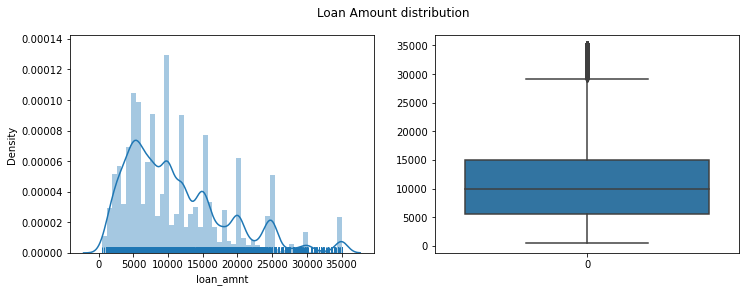

In [27]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [28]:
#Stats of loan amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

<b> Observations: </b>
<i>From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.</i>

<b> funded_amnt :- </b>The total amount committed to that loan at that point in time.

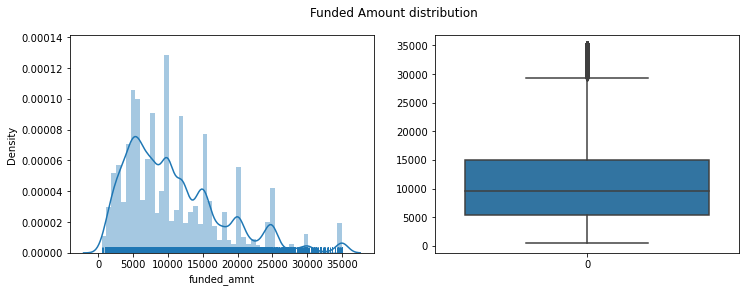

In [29]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.funded_amnt)
#Single title for both subplots.
plt.suptitle('Funded Amount distribution')
plt.show()

In [30]:
#Stats of funded amount
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10880.79
std      7109.16
min       500.00
5%       2400.00
10%      3200.00
25%      5400.00
50%      9600.00
75%     15000.00
90%     20375.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

<b>Observation :</b> <i>Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.</i>

<b> funded_amnt_inv :- </b> The total amount committed by investors for that loan at that point in time.

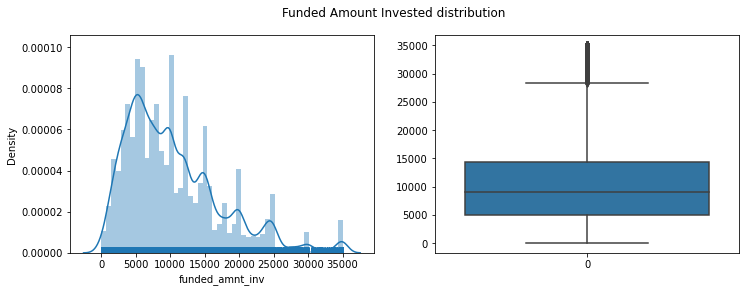

In [31]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.funded_amnt_inv)
#Single title for both subplots.
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [32]:
#stats of funded_amnt_inv
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

<b>Observations:</b> <i>Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.</i>

<b> Interest Rate :-</b> Interest Rate on the loan

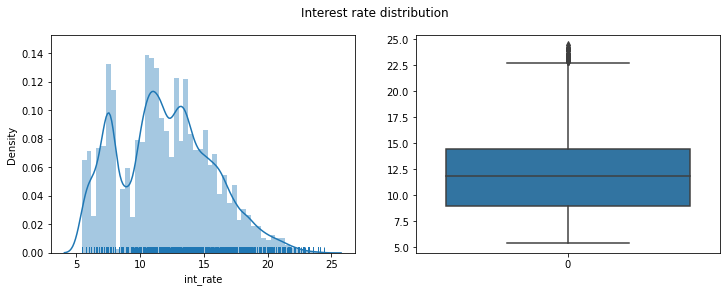

In [33]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.int_rate)
#Single title for both subplots.
plt.suptitle('Interest rate distribution')
plt.show()

<b> Observations: </b> <br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between <b> 9% to 14.5%</b>. Some people took loan at higher rates of interest i.e.,<b> 22.5% </b>

In [34]:
#stats of int_rate
data.int_rate.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean       11.98
std         3.70
min         5.42
5%          6.17
10%         7.14
25%         8.94
50%        11.83
75%        14.46
90%        16.82
95%        18.39
99%        20.99
max        24.40
Name: int_rate, dtype: float64

<b> Installment :- </b> The monthly payment owed by the borrower if the loan originates.

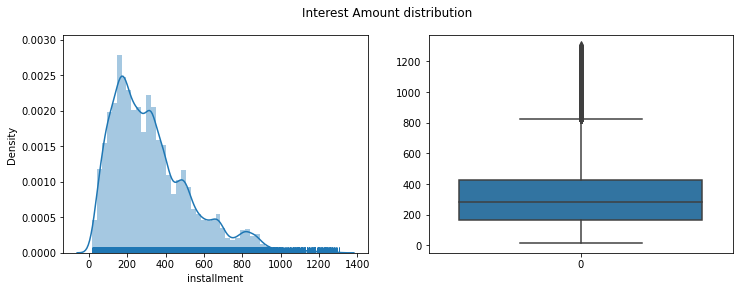

In [35]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.installment, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.installment)
#Single title for both subplots.
plt.suptitle('Interest Amount distribution')
plt.show()

In [36]:
#stats of installment
data.installment.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean      324.91
std       208.89
min        16.08
5%         73.05
10%       100.63
25%       167.73
50%       280.11
75%       429.37
90%       622.97
95%       763.56
99%       933.05
max      1305.19
Name: installment, dtype: float64

<b> Observations:</b> The Most representative value of Installment amount in around 280.

<b> annual_inc </b> The self-reported annual income provided by the borrower during registration.

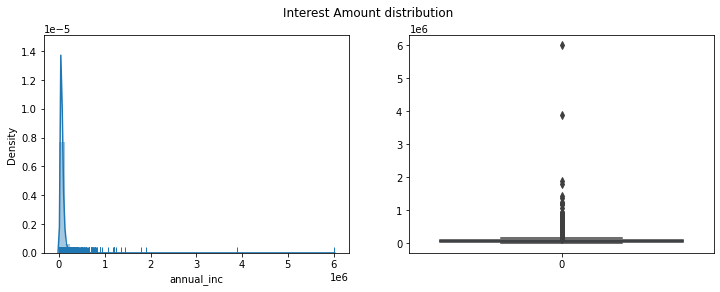

In [37]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.annual_inc, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.annual_inc)
#Single title for both subplots.
plt.suptitle('Interest Amount distribution')
plt.show()

In [38]:
#stats of annual_inc
data.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
5%        24000.00
10%       30000.00
25%       41133.00
50%       60000.00
75%       83000.00
90%      116738.90
95%      142000.00
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64

<b> Observation </b> Around 361 people are having more the 235000 annual income. and <i> 99% </i> of people are having <i>incomes below 235000.</i>

<b> dti </b> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

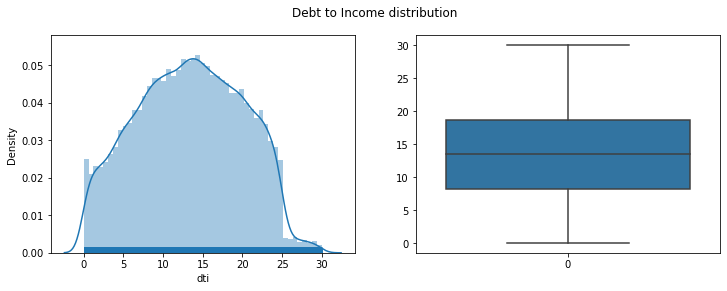

In [39]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.dti, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.dti)
#Single title for both subplots.
plt.suptitle('Debt to Income distribution')
plt.show()

<b> Observation </b> Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

<b> pub_rec </b> Number of derogatory public records

Text(0.5, 1.0, 'pub_rec Distribution')

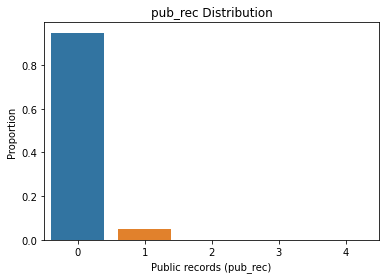

In [40]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel('Public records (pub_rec)')
plt.ylabel('Proportion')
plt.title(var+' Distribution')

<b> Observation </b> Around <i> 90% </i> borrower's are having no public derogatory records.

<b> pub_rec_bankruptcies </b> Number of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

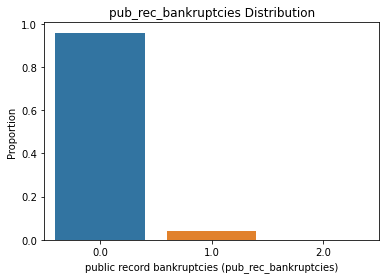

In [41]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel('public record bankruptcies (pub_rec_bankruptcies)')
plt.ylabel('Proportion')
plt.title(var+' Distribution')

<b> Observations:</b> <i> 99% </i> people have not went bankrupt.

<b> Loan issue date (issue_d) </b> The month which the loan was funded

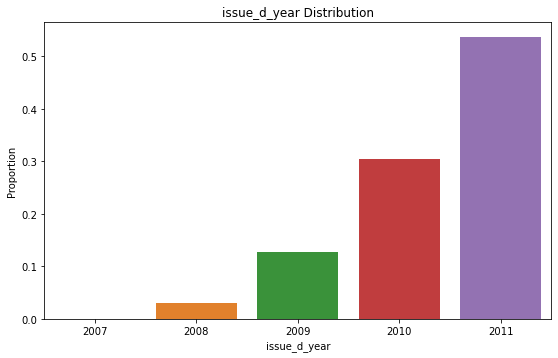

In [42]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

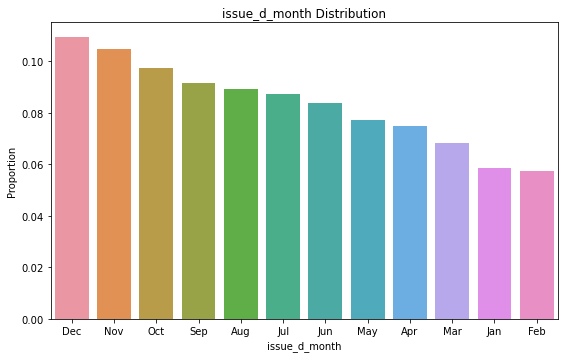

In [43]:
var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,12))
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

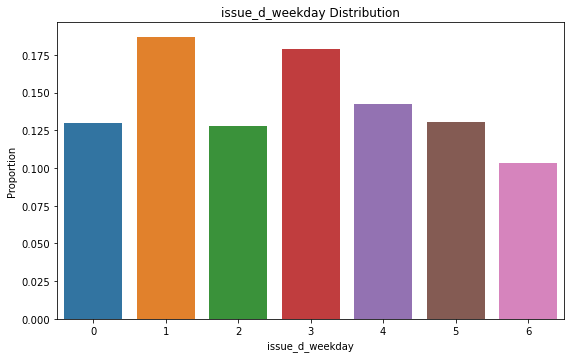

In [44]:
var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.figure(figsize=(20,12))
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

    Note: issue_d_weekday , issue_d_month and issue_d_year came from derived variables

<b> Observations:</b>
<ol> <li>The lending club(LC) has doubling loan issues every year.</li>
<li>There are <i> more issues of loan in last 3 months </i> every end of the ear i.e., Oct, Nov and Dec.</li>
<li>LC has <i> issued more loans on tuesday and wednessday </i> than other week days.</li></ol>

<b> term </b> The number of payments on the loan. Values are in months and can be either 36 or 60.

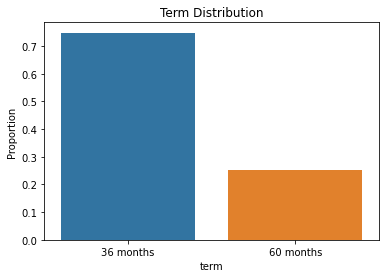

In [45]:
#Probability / Percentage of each values
prob_df = data.term.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='term', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

<b> Observation </b> Borrowers have taken <i> 36 months tenure</i> more than<i> 60 months</i>.

<b> Earliest Credit line (earliest_cr_line) </b> The month the borrower's earliest reported credit line was opened

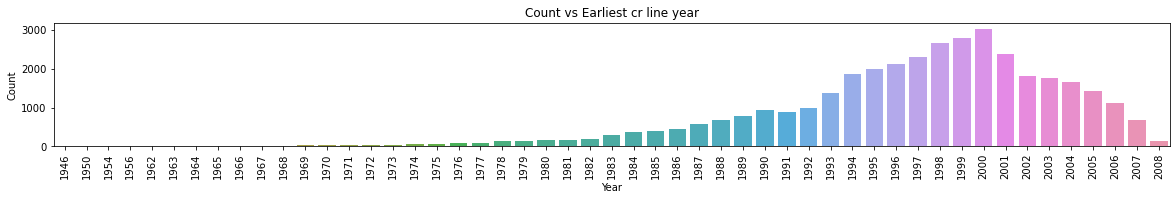

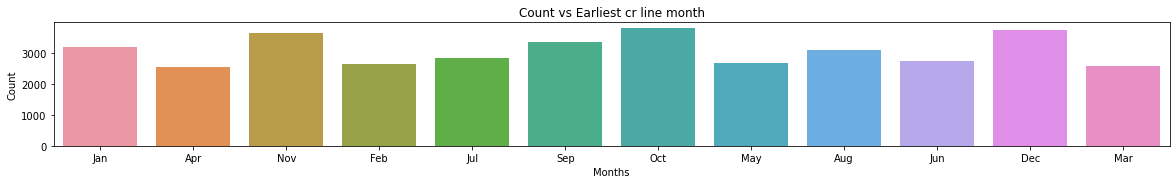

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

<b> Observation </b> Many of Loan borrowers of LC have got <i>earlier credit line in 2000 year</i>, and also most have got earlier credit line on end of the year i.e., <i> Oct, Nov, Dec</i>

<b> grade </b> LC assigned loan grade.

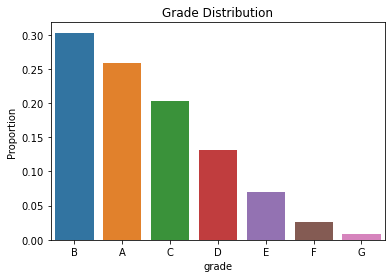

In [47]:
#Probability / Percentage of each values
prob_df = data.grade.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='grade', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('Grade Distribution')
plt.show()

<b> Observation </b> Most borrowers fall under <i> A and B grades </i> then other grades

<b> sub_grade </b> LC assigned loan subgrade

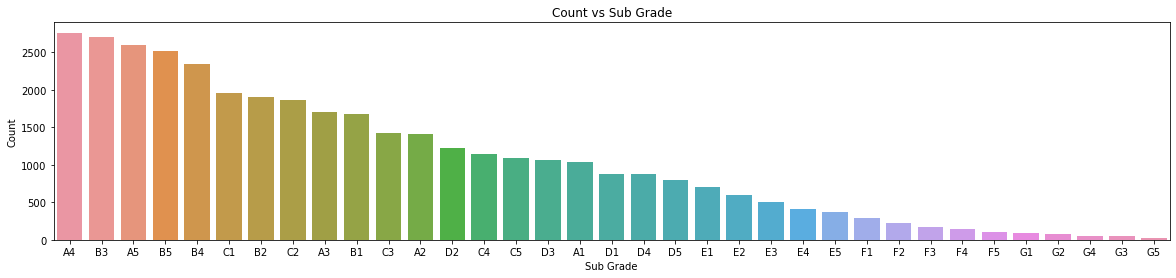

In [48]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

<b> Observation </b> sub_grade mostly counts on <i>A4 , B3 , A5 and B5</i>.

<b> emp_length </b> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

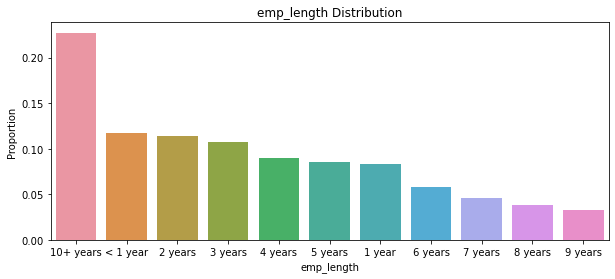

In [49]:
plt.figure(figsize=(10,4))
#Probability / Percentage of each values
prob_df = data.emp_length.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='emp_length', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('emp_length Distribution')
plt.show()

<b> Observation </b> Borrowers are <i> mostly 10+ years </i> emploment length.

<b> home_ownership</b> The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

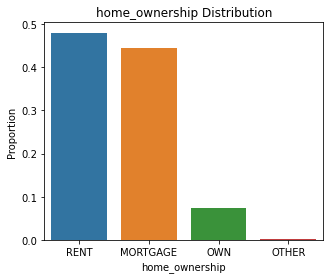

In [50]:
plt.figure(figsize=(5,4))
#Probability / Percentage of each values
prob_df = data.home_ownership.value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y='home_ownership', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('home_ownership Distribution')
plt.show()

<b> Observation </b> The loan borrowers are mostly having <i> rented and mortgage houses</i>.

<b> verification_status </b> Indicates if income was verified by LC, not verified, or if the income source was verified

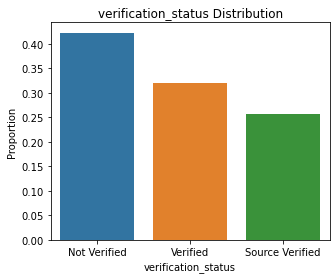

In [51]:
plt.figure(figsize=(5,4))
#Probability / Percentage of each values
prob_df = data.verification_status.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='verification_status', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('verification_status Distribution')
plt.show()

<b> Observation </b> Majority of loans were given <i>without verification of applicants income</i>.

<b> loan_status </b> Current status of the loan

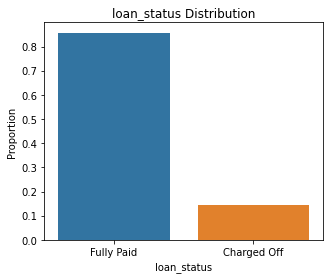

In [52]:
plt.figure(figsize=(5,4))
#Probability / Percentage of each values
prob_df = data.loan_status.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan_status Distribution')
plt.show()

<b> Observation </b> <i>85%</i> of borrowers has paid the loan fully, where are<i> 14% </i>are defaulted the loan.

<b>purpose</b> A category provided by the borrower for the loan request.

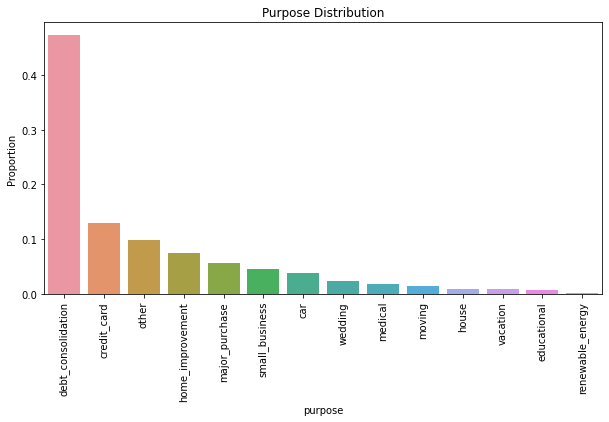

In [53]:
plt.figure(figsize=(10,5))
#Probability / Percentage of each values
prob_df = data.purpose.value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='purpose', data=prob_df)
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

<h5> Segmented Univariate Analysis </h5>

<b> Loan Amount </b><br>
<ul><li> Terms vs Loan Amount </li>
<li> Grade vs Loan Amount </li>
<li>home_ownership vs Loan Amount </li>
<li>verification_status vs Loan Amount </li>
<li>loan_status vs Loan Amount </li>
<li>purpose vs Loan Amount</li>
<li>emp_length vs Loan Amount</li>
<li>Issued year vs Loan Amount</li>
<li>Issued month vs Loan Amount</li>
<li>Earliest Credit Line year vs Loan Amount</li>
<li>Earliest Credit Line month vs Loan Amount</li></ul>

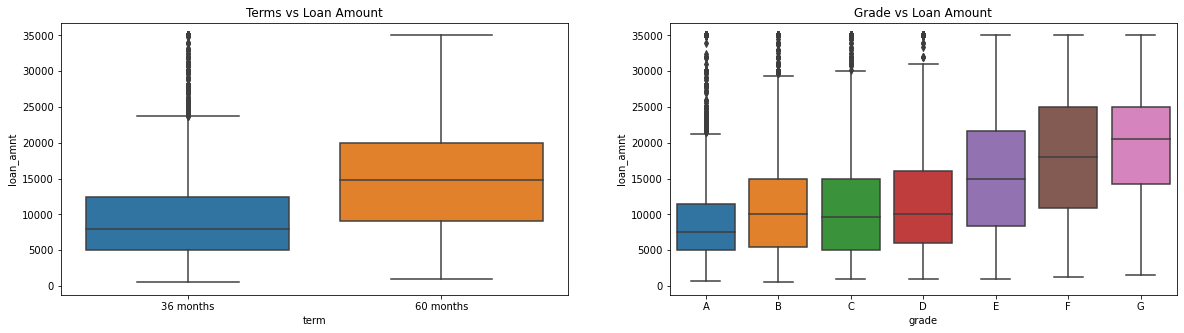

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(1,2,2)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)
plt.show()

<b> Observations</b> :<br>
<ol><li>Higher amount loans have <i>high tenure</i> i.e, 60 months.</li>
    <li>Grade <i>'F' and 'G'</i> have taken max loan amount. As Grades are decreasing the loan amount is increasing.</li></ol>

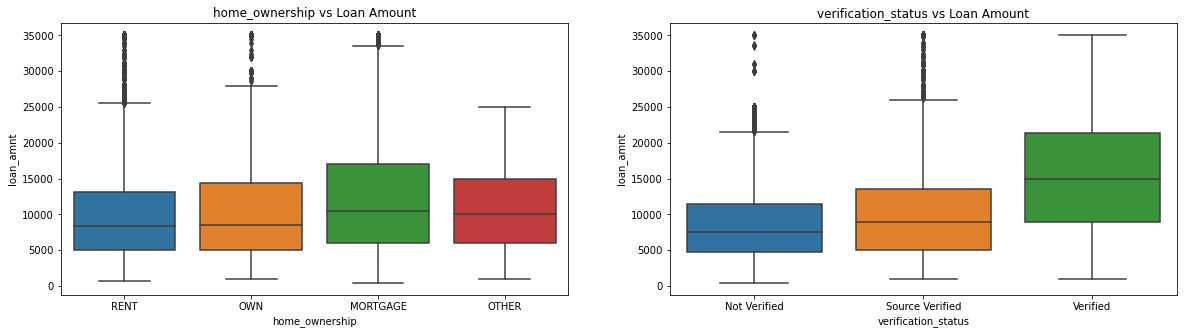

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)
plt.show()

<b>Observation</b> more borrowers are from <i> MORTAGE</i> and also the median loan amount also high for MORTAGE owned borrowers.<br>
And <i>most of borrowers are verified for borrowing loan >9k<i/>

Text(0.5, 1.0, 'loan_status vs Loan Amount')

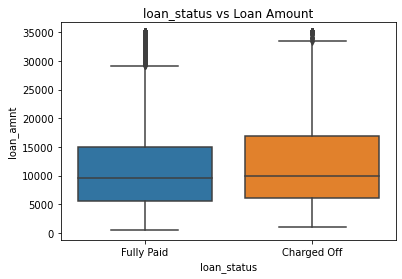

In [56]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

<b> Observation </b> Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

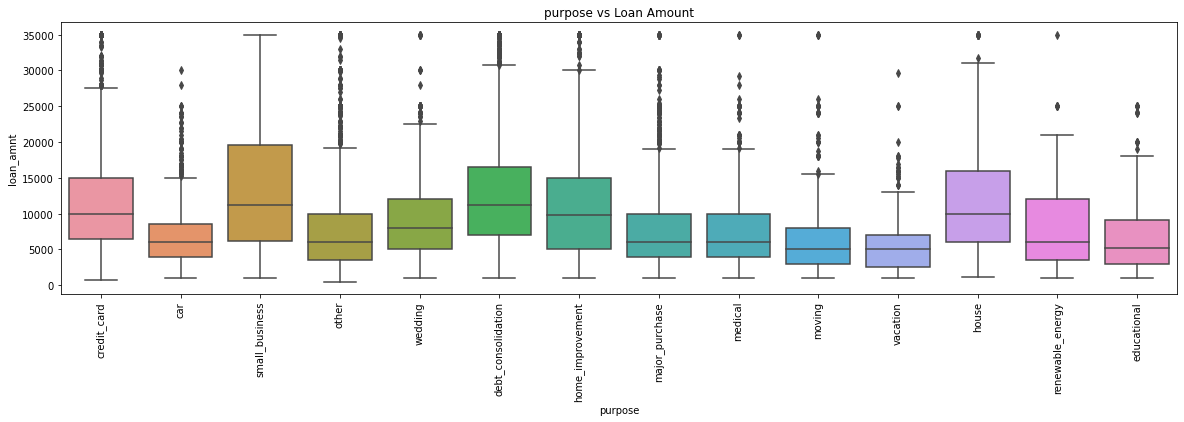

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

<b> Observation</b> More loan amount is from <i>small_business</i> and <i>debt_consolidation</i>.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

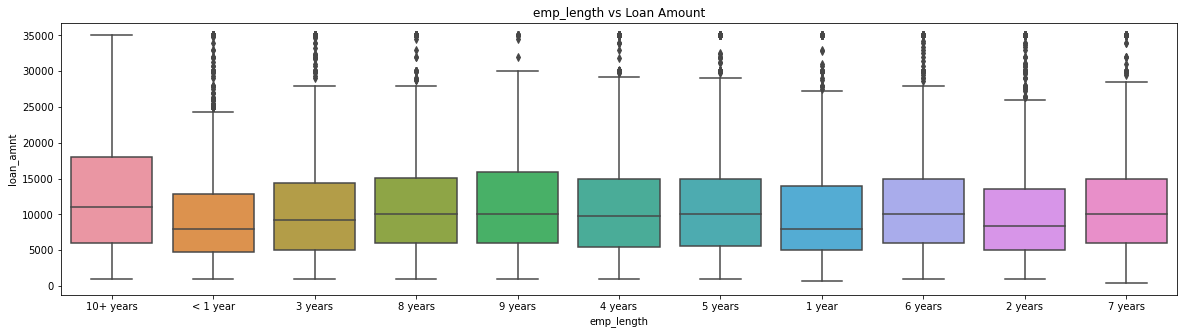

In [58]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

<b> observation</b> more borrowers are from<i> 10+ years </i> and least is <i> <1 year </i>

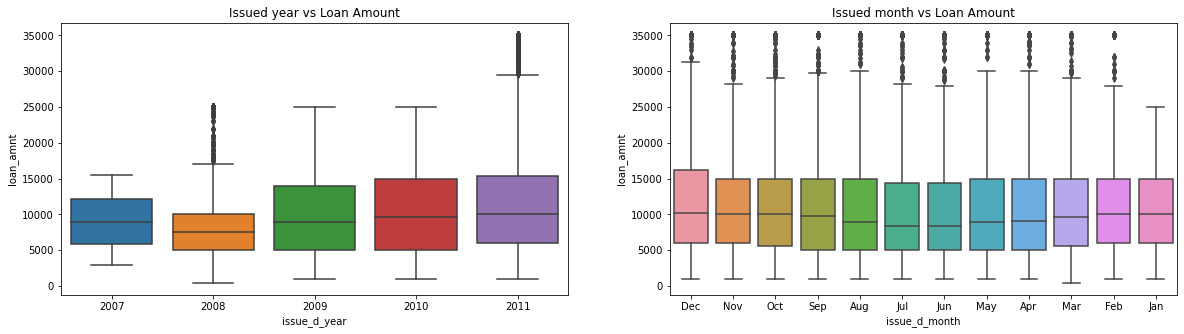

In [59]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(1,2,2)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

<b> Observations</b>
<ol>
<li>The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.</li>
<li>Few Loan borrowers took higher loan amount in 2008 and 2011 which are plotted as outliers.</li>
<li>Loan borrowers took almost similar amounts in all the months except in December, people have taken higher amounts as distribution is high above median.</li></ol>

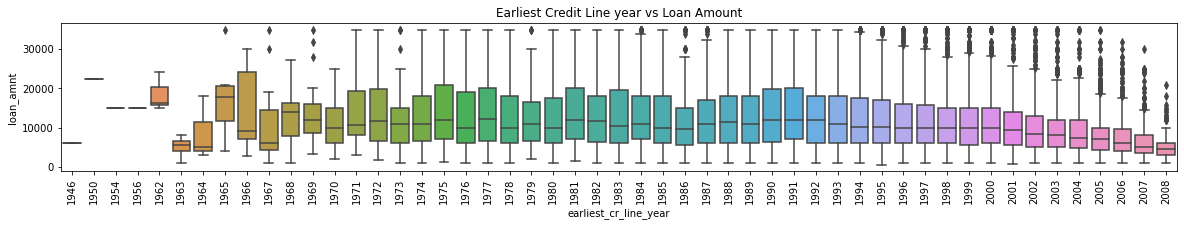

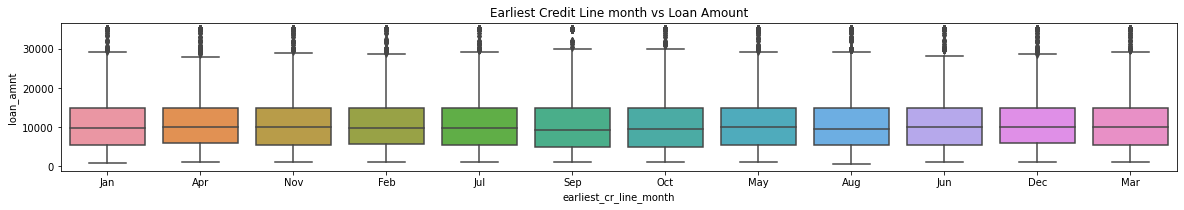

In [60]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

<b> Observation </b> Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

<b> funded_amnt </b>
<ul>
    <li>Terms vs funded amount</li>
    <li>Grade vs funded amount</li>
    <li>Issued year vs funded amount</li>
    <li>Issued month vs funded amount</li>
    <li>loan_status vs funded amount</li>
    <li>purpose vs funded amount</li>
    <li>emp_length vs funded amount</li>
</ul>

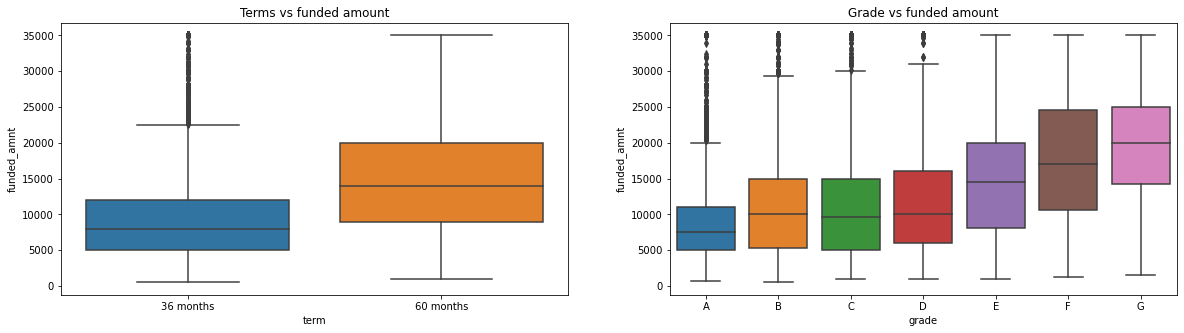

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)
plt.show()

<b> Observation </b> The Funded Amount has similar observations as Loan Amount.

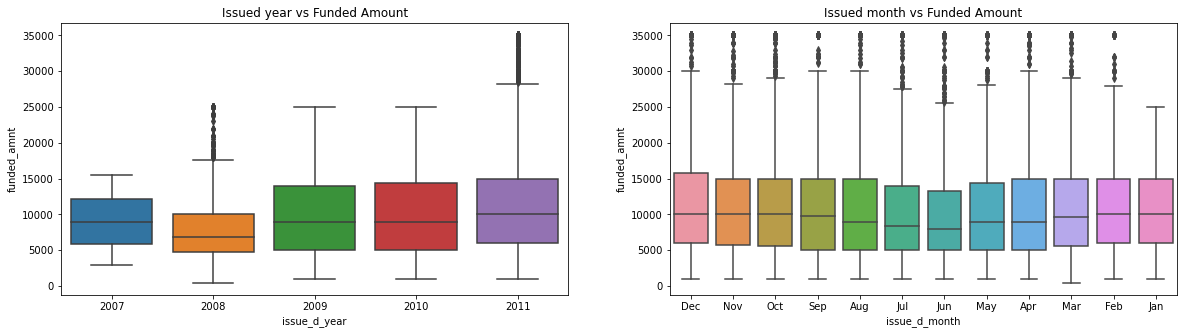

In [62]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

<b> Observation </b> The Funded Amount has similar observations as Loan Amount.

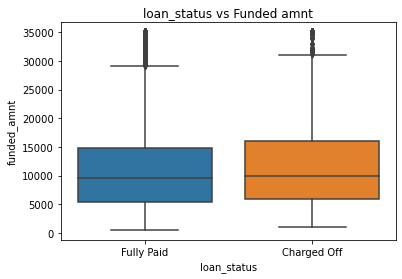

In [63]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')
plt.show()

<b> Observation </b> The Funded Amount has similar observations as Loan Amount.

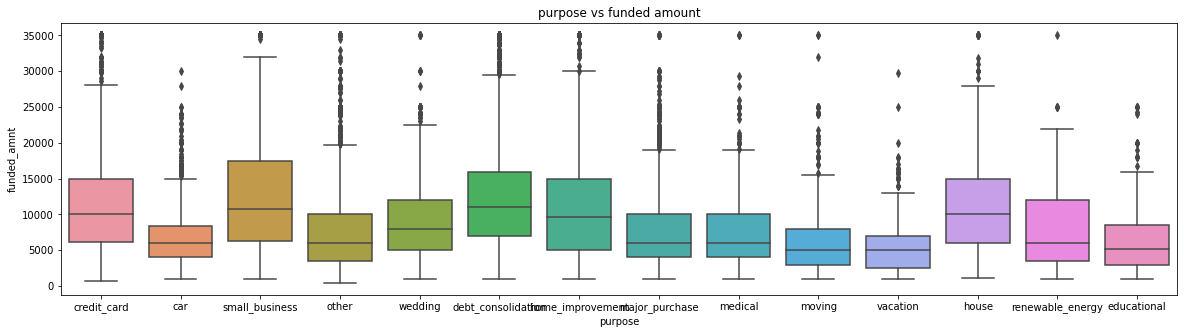

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')
plt.show()

<b> Observation </b> The Funded Amount has similar observations as Loan Amount.

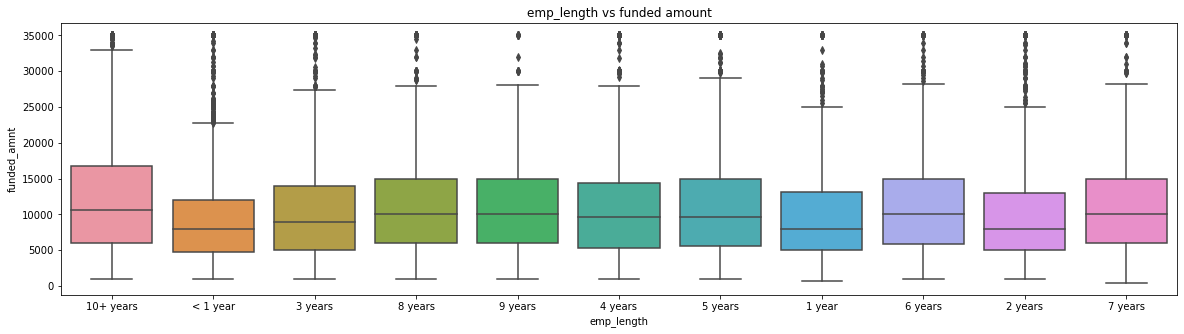

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')
plt.show()

<b> Observation </b> The Funded Amount has similar observations as Loan Amount.

<b> int_rate </b>
<ul>
    <li>Term vs Interest Rate</li>
    <li>Grade vs Interest Rate</li>
    <li>home_ownership vs Interest Rate</li>
    <li>verification_status vs Interest Rate</li>
    <li>loan_status vs Interest Rate</li>
    <li>purpose vs Interest Rate</li>
    <li>emp_length vs Interest Rate</li>
    <li>Issued year vs Interest Rate</li>
    <li>Issued month vs Interest Rate</li></ul>

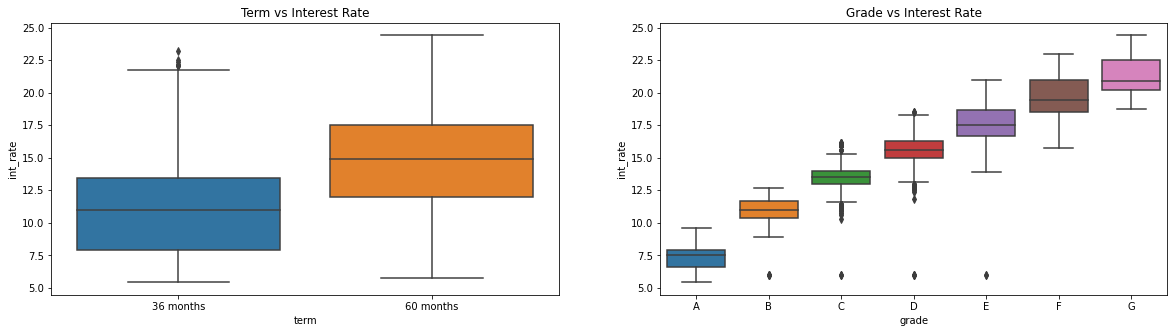

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)
plt.show()

<b> Observation </b>
The interest rates are higher for Higher tenure loans and Higher as Grades are Lowering (A to G).

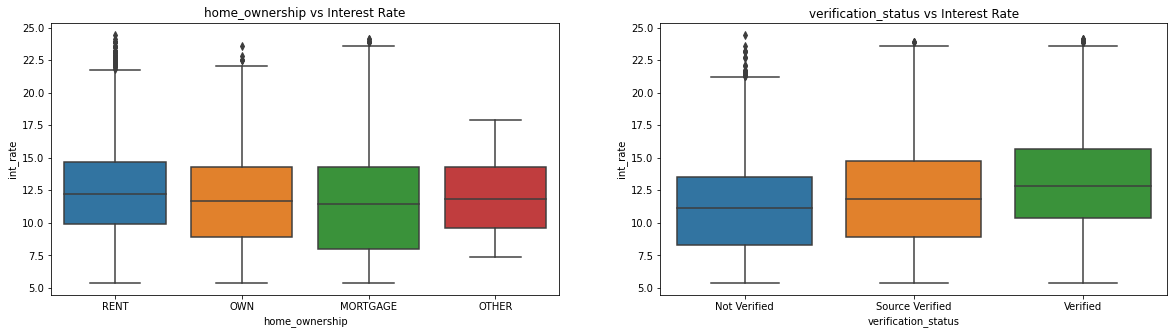

In [67]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)
plt.show()

<b> Observations </b>
<ol>
<li>Borrowers with OWN and MORTGAGE got loans with less interest rates as the security will be there.</li>
<li>The Not-Verified borrowers got less interest rates compared to Verified and Source Verified borrowers.</li>
</ol>

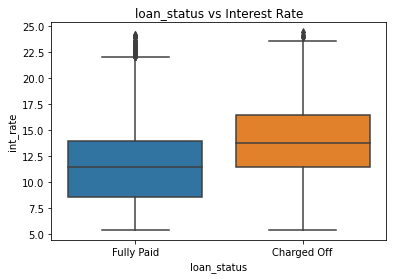

In [68]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')
plt.show()

<b>observation </b> This clearly tells us, grater the interest rate more the chance of defaulting the loan.

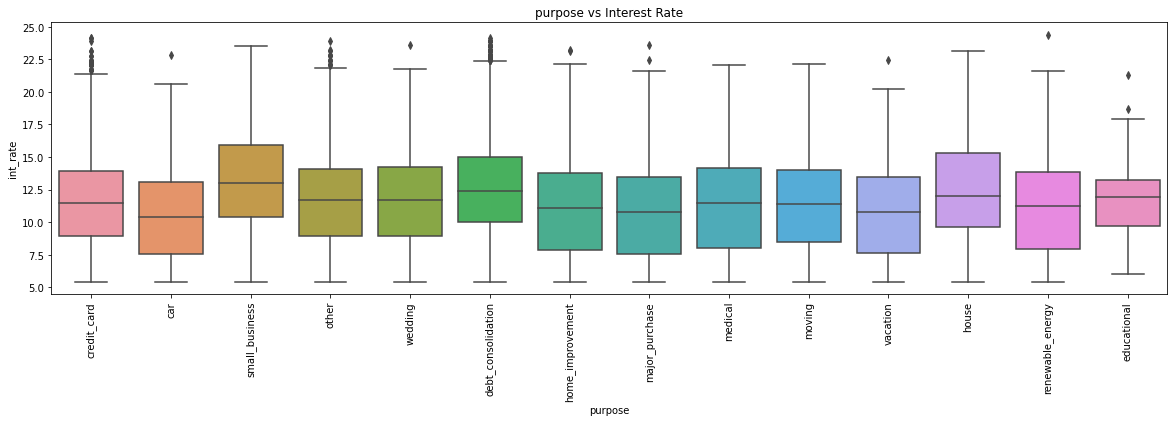

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

<b> Observation </b> <i>small_business, bebt_consolidation and house loans</i> are given with more interest rates comparativesly others.

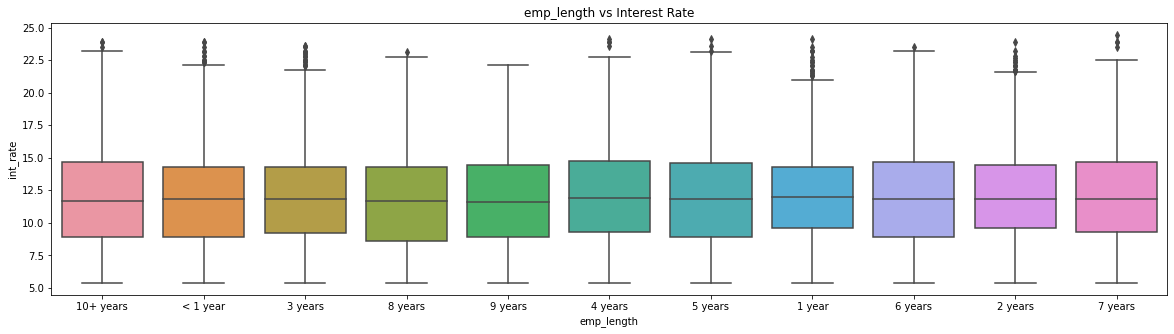

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')
plt.show()

<b> Observation </b> Looks like there is no much relation between Employment length and interest rate.

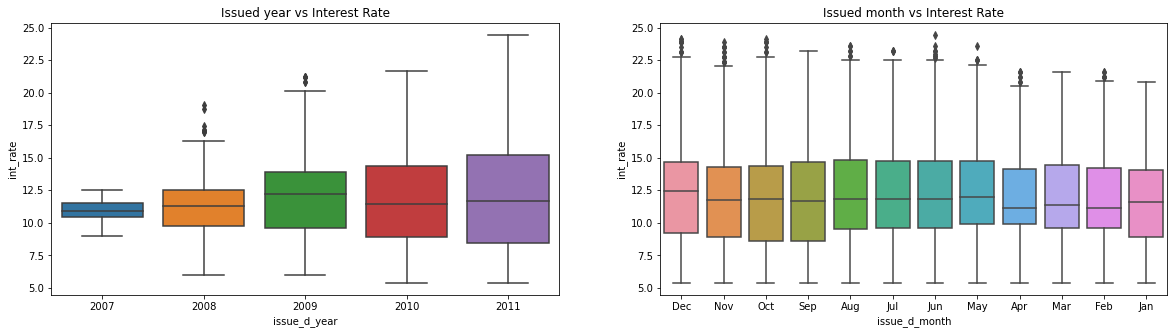

In [71]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

<b>Observation </b>As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.

<b> annual_inc </b>
<ul>
    <li>Terms vs annual income</li>
    <li>Grade vs annual income</li>
    <li>home_ownership vs annual income</li>
    <li>verification_status vs annual income</li>
    <li>loan_status vs annual income</li>
    <li>purpose vs annual income</li>
    <li>Employee length vs annual income</li>
    <li>Issued year vs Annual Income of Borrower</li>
    <li>Issued month vs Annual Income of Barrower</li>
    <li>Issued year vs Loan Amount</li>
    <li>Issued month vs Loan Amount</li>
</ul>

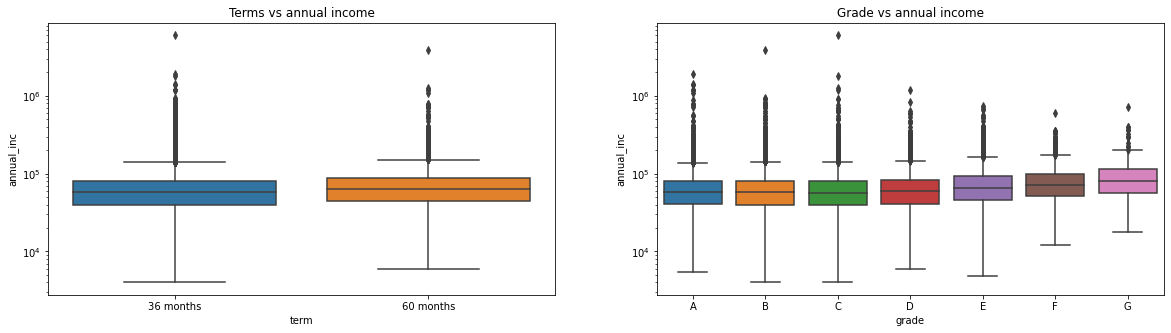

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')
plt.show()

<b> Observation </b> Comparatively Annual income is higher for lower grades.

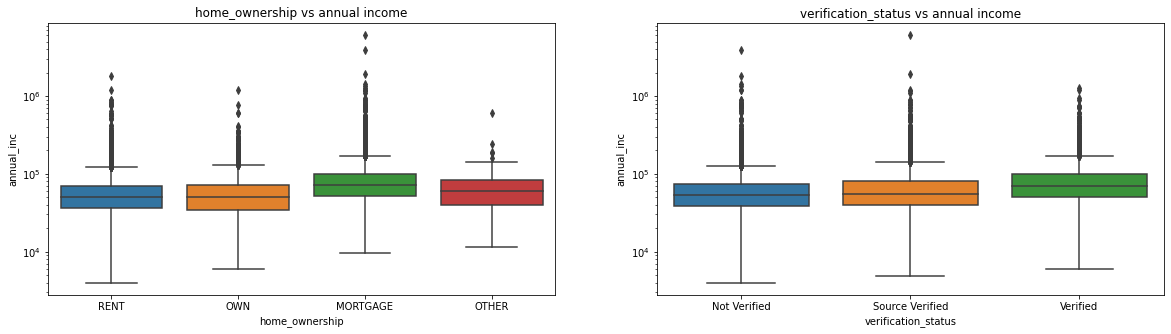

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

<b> Obervation </b>
<ol><li>The home_ownership status for MORTGAGE has higher income.</li>
<li>The income source was verfied for most of the borrower's who had higher annual incomes.</li></ol>

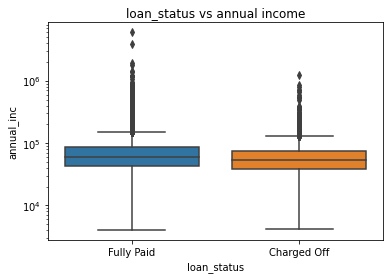

In [74]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

<b> Observation </b> Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

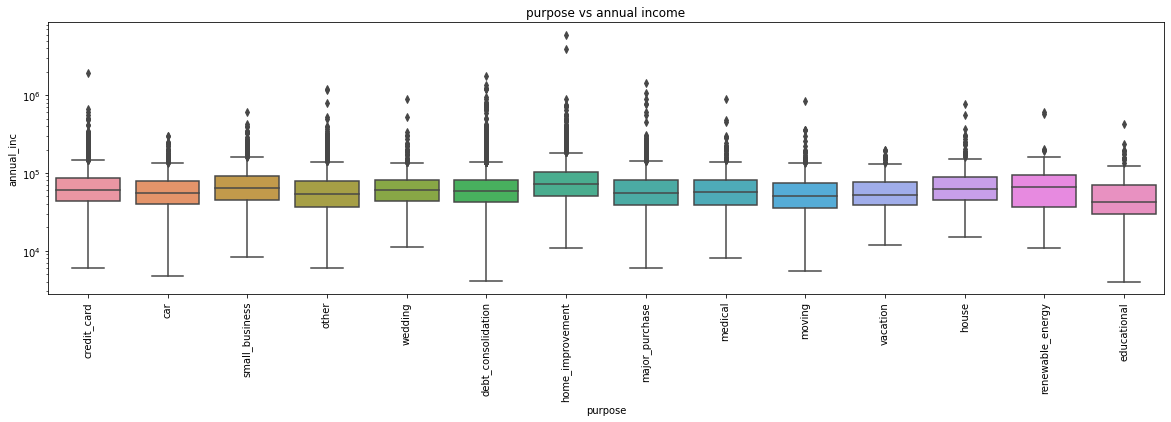

In [75]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

<b> Observation </b> A category belonging to <i>renewable_energy, small_business and home_improvement</i> have higher annual income provided by the borrower for the loan request.

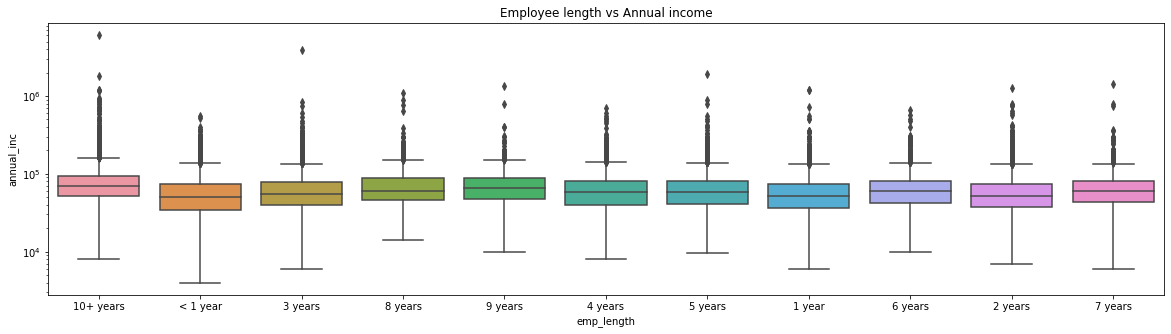

In [76]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

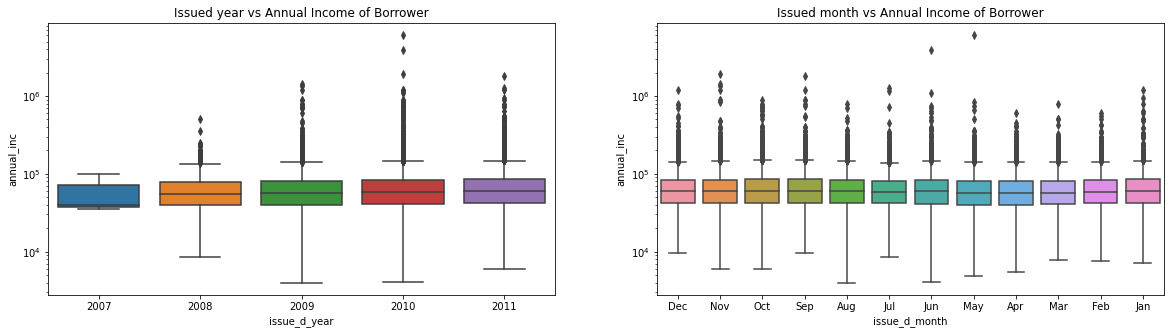

In [77]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
plt.title('Issued year vs Annual Income of Borrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Borrower')
plt.yscale('log')
plt.show()

<b> Observation </b> Annual income has <i>no impact with the month</i> when the loan was funded

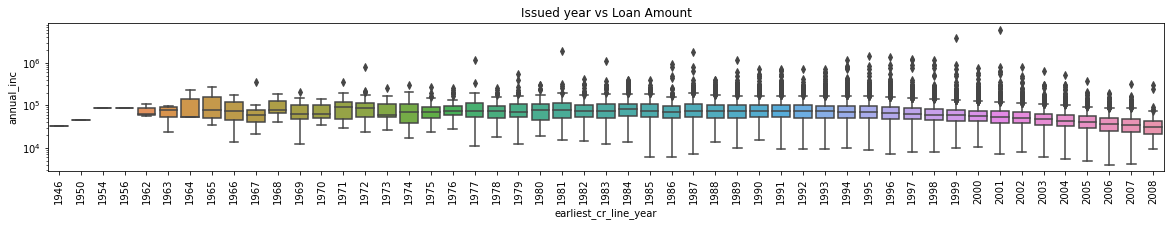

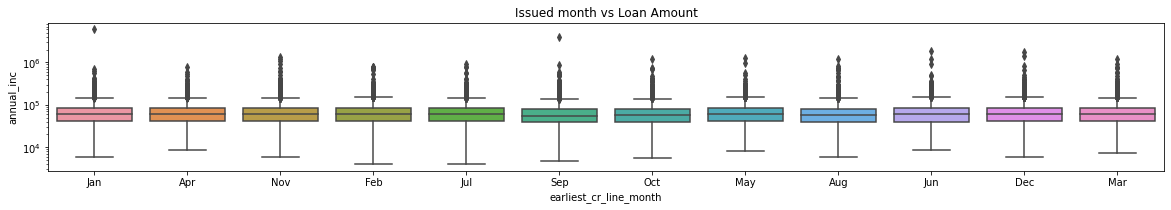

In [78]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

<b> Observation </b> There is not specific pattern in the annual income and earliest Credit line year and month.

<b> dti  (Debt to Income Ratio)</b>
<ul>
    <li>Terms vs dti</li>
    <li>Grade vs dti</li>
    <li>verification_status vs dti</li>
    <li>loan_status vs dti</li>
    <li>purpose vs dti</li>
    <li>emp_length vs dti</li>

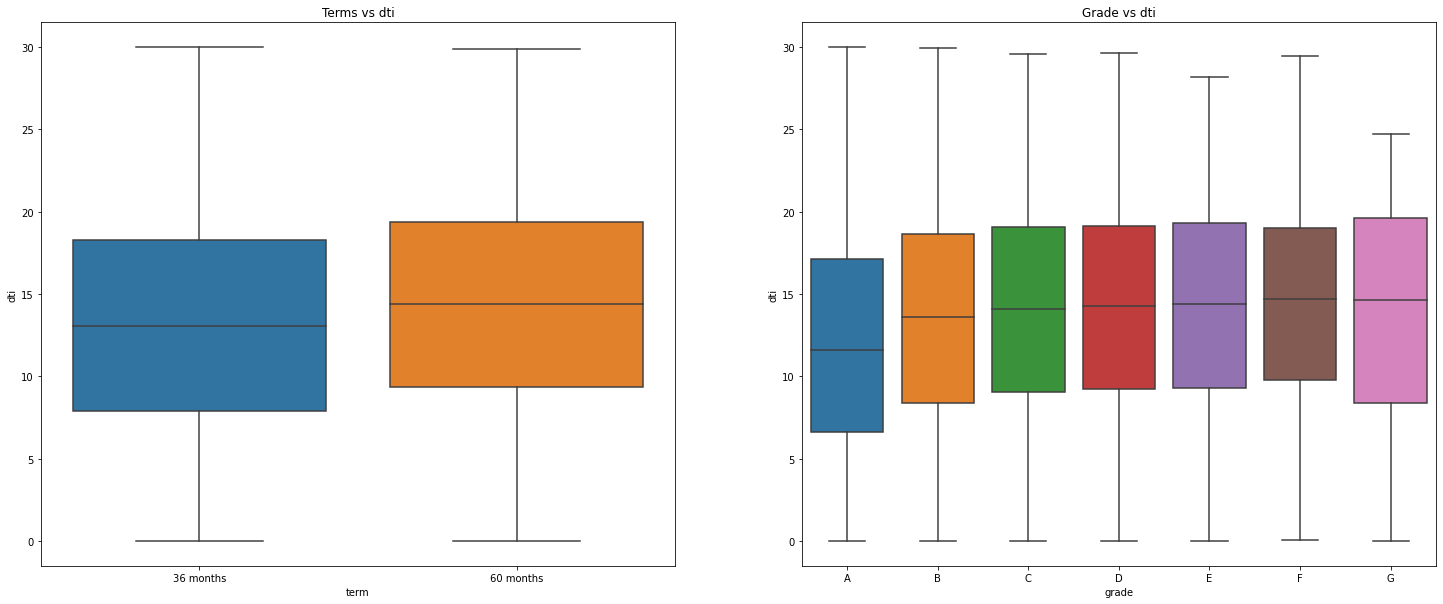

In [79]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)
plt.show()

<b> Observation </b>
<ol> <li> dti is bit high for people who got more tenure i.e., 60 months.</li>
<li>'A' Grade borrowers are having low dti than Other grades. dti should be low for having high repayment percentage.</li></ol>

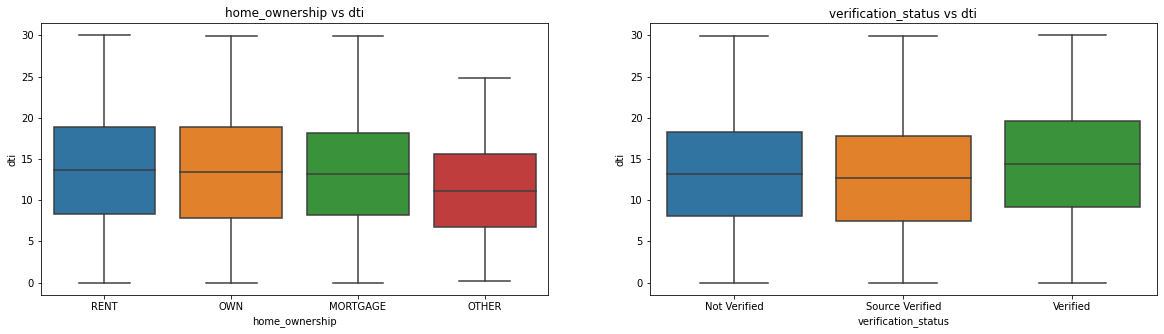

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)
plt.show()

<b> Observation </b> People in OTHER home_ownership has less dti than others. This is may be bacause other people have mortgage and home loans.

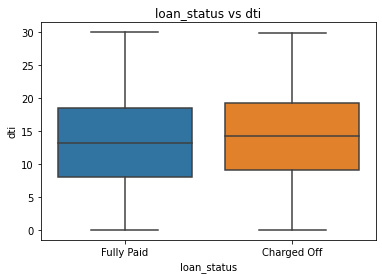

In [81]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')
plt.show()

<b> Observations </b> Borrowers with high dti has bit more probability to default

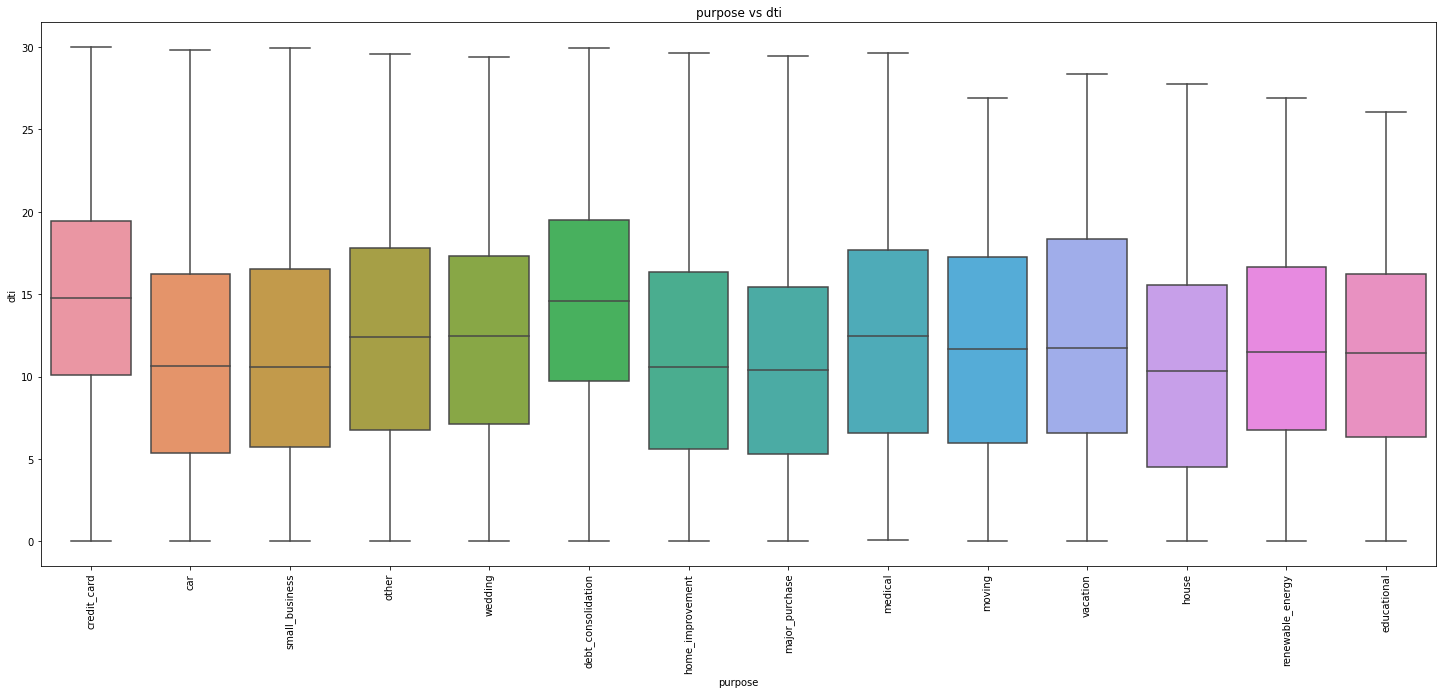

In [84]:
plt.figure(figsize=(25,10))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

<b> Observation </b> People who took loan for <i> credit_card</i> and <i>debt_consolidation</i> purpose has more dti than other purposes.

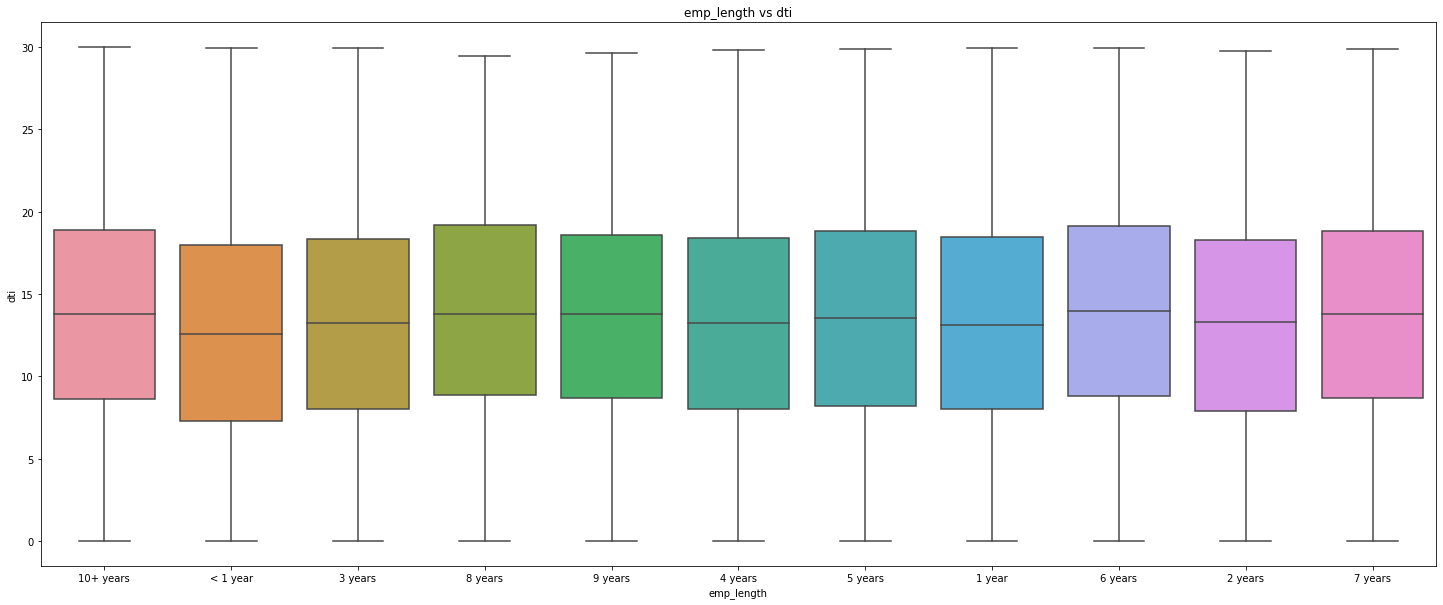

In [85]:
plt.figure(figsize=(25,10))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')
plt.show()

<b> Observation </b> The dti is pretty much similar for borrowers with all the employment length.

<b> pub_rec</b>
<ul>
    <li>terms vs Public records</li>
    <li> Grade vs Public records</li>
    <li>home_ownership vs Public records</li>
    <li>Verification status vs Public records</li>
    <li>loan status vs Public records</li>
    <li>Purpose vs Public records</li>
    <li>Employee length vs Public records</li>
</ul>

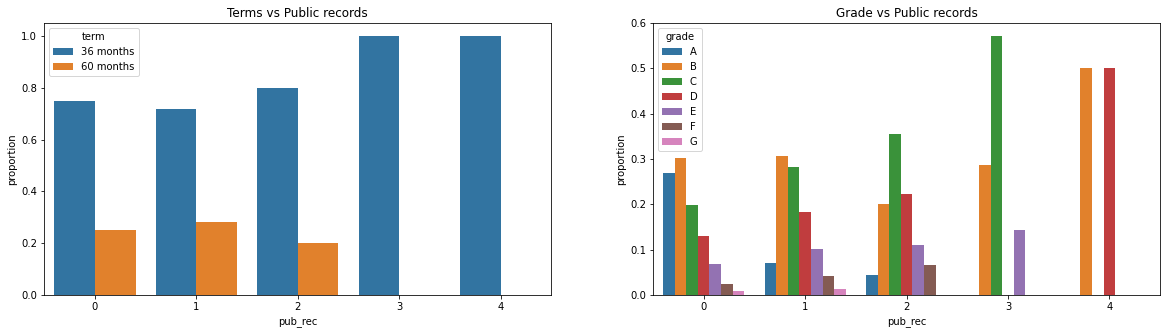

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
#Finding proportation of values in each value of category
df_term = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df_term['proportion'] = df_term.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='term' , data =df_term)
plt.title('Terms vs Public records')

plt.subplot(1,2,2)
#Finding proportation of values in each value of category
df_grade = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df_grade['proportion'] = df_grade.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df_grade)
plt.show()

<b> Observation </b>

<ol>
<li>Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.</li>
<li>We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.</li>
<li>Exceptionally C,D,E graded people are having high pub_recs.</li></ol>

In [87]:
print (df_term)
print(df_grade)

   pub_rec       term     id  proportion
0        0  36 months  26152        0.75
1        0  60 months   8719        0.25
2        1  36 months   1349        0.72
3        1  60 months    526        0.28
4        2  36 months     36        0.80
5        2  60 months      9        0.20
6        3  36 months      7        1.00
7        4  36 months      2        1.00
    pub_rec grade     id  proportion
0         0     A   9384        0.27
1         0     B  10561        0.30
2         0     C   6925        0.20
3         0     D   4497        0.13
4         0     E   2378        0.07
5         0     F    856        0.02
6         0     G    270        0.01
7         1     A    132        0.07
8         1     B    576        0.31
9         1     C    529        0.28
10        1     D    344        0.18
11        1     E    190        0.10
12        1     F     80        0.04
13        1     G     24        0.01
14        2     A      2        0.04
15        2     B      9        0.20
16

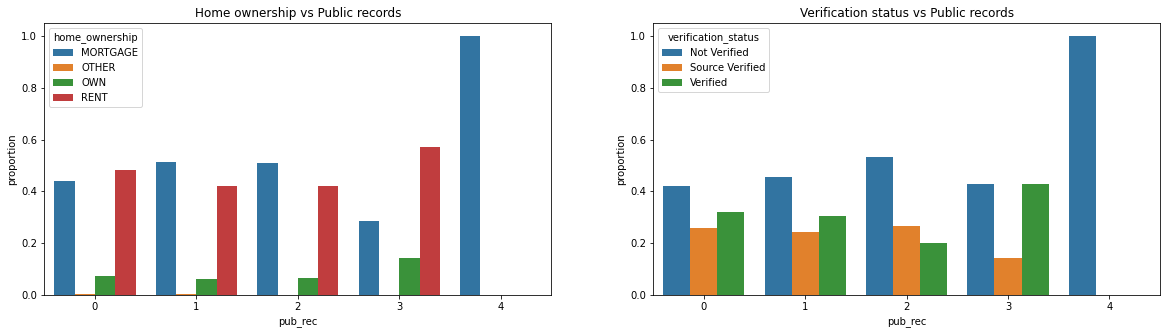

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df_home_ownership = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df_home_ownership['proportion'] = df_home_ownership.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df_home_ownership)

plt.title('Home ownership vs Public records')

df_verification_status = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df_verification_status['proportion'] = df_verification_status.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df_verification_status)

plt.title('Verification status vs Public records')
plt.show()

In [89]:
print(df_home_ownership)
print(df_verification_status)

    pub_rec home_ownership     id  proportion
0         0       MORTGAGE  15341        0.44
1         0          OTHER     93        0.00
2         0            OWN   2582        0.07
3         0           RENT  16855        0.48
4         1       MORTGAGE    966        0.52
5         1          OTHER      3        0.00
6         1            OWN    117        0.06
7         1           RENT    789        0.42
8         2       MORTGAGE     23        0.51
9         2            OWN      3        0.07
10        2           RENT     19        0.42
11        3       MORTGAGE      2        0.29
12        3            OWN      1        0.14
13        3           RENT      4        0.57
14        4       MORTGAGE      2        1.00
    pub_rec verification_status     id  proportion
0         0        Not Verified  14671        0.42
1         0     Source Verified   9018        0.26
2         0            Verified  11182        0.32
3         1        Not Verified    854        0.46
4        

<b>Observation </b> Borrowers with 4 public Derogatory records are high in MORTGAGE home_ownsership category and also Not-Verified category of verification_status.

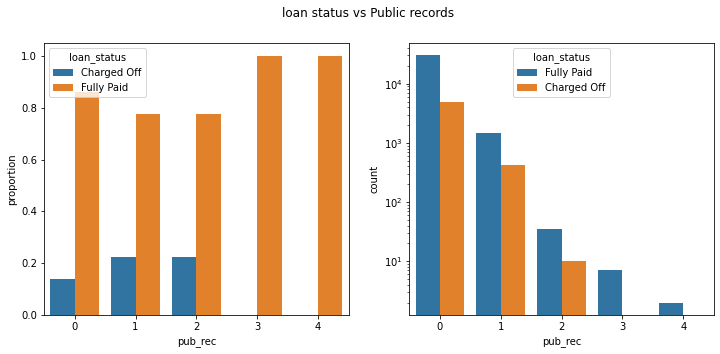

In [90]:
#Proportion of values for each category
df_loan_status = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df_loan_status['proportion'] = df_loan_status.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df_loan_status)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')
plt.show()

<b> Observation </b>
The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

Text(0.5, 1.0, 'Purpose vs Public records')

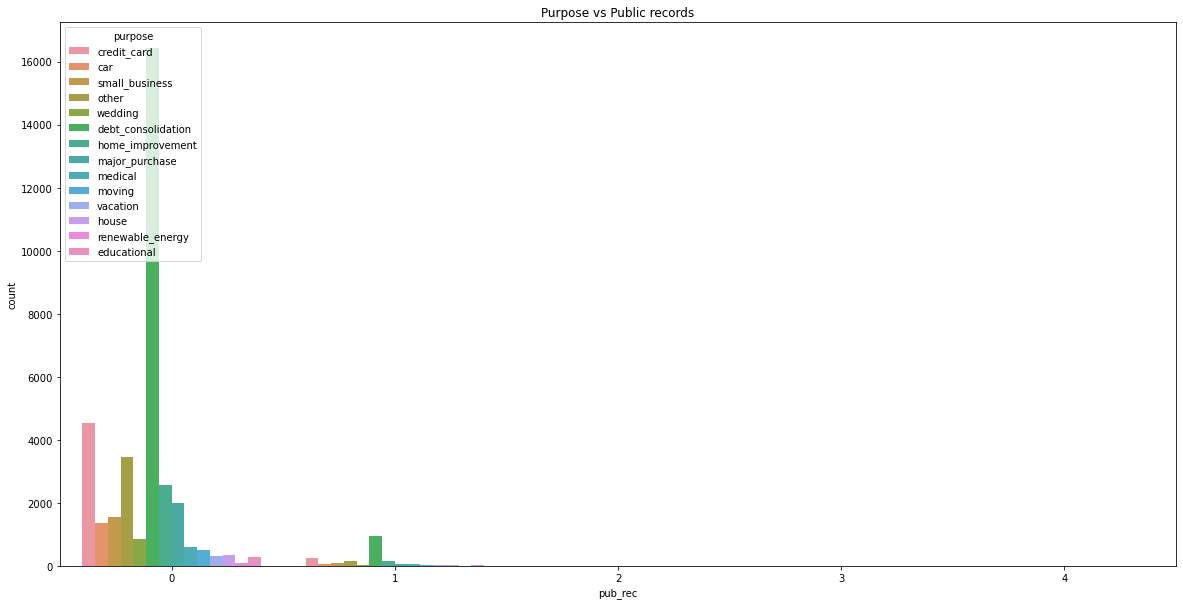

In [91]:
plt.figure(figsize=(20,10))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

<b> Observation </b> The purpose of debt_consolidation loan is more than the other categories. 

Text(0.5, 1.0, 'Employee length vs Public records')

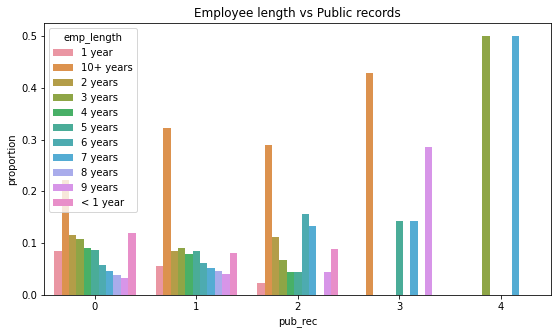

In [92]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df_emp_length = data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df_emp_length['proportion'] = df_emp_length.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df_emp_length)
plt.title('Employee length vs Public records')

In [93]:
print(df_emp_length)

    pub_rec emp_length    id  proportion
0         0     1 year  2964        0.08
1         0  10+ years  7746        0.22
2         0    2 years  4038        0.12
3         0    3 years  3772        0.11
4         0    4 years  3141        0.09
5         0    5 years  2996        0.09
6         0    6 years  2009        0.06
7         0    7 years  1581        0.05
8         0    8 years  1320        0.04
9         0    9 years  1131        0.03
10        0   < 1 year  4173        0.12
11        1     1 year   106        0.06
12        1  10+ years   606        0.32
13        1    2 years   159        0.08
14        1    3 years   171        0.09
15        1    4 years   147        0.08
16        1    5 years   158        0.08
17        1    6 years   117        0.06
18        1    7 years    97        0.05
19        1    8 years    88        0.05
20        1    9 years    74        0.04
21        1   < 1 year   152        0.08
22        2     1 year     1        0.02
23        2  10+

<b> Observation </b> 3years and 7years employee length are high in 4 public Derogatory records category and also 10 years of employee length higher in 1 , 2 and 3 records

<b> pub_rec_bankruptcies </b>
<ul>
    <li>Terms vs Public record bankruptcies</li>
    <li>Grade vs Public record bankruptcies</li>
    <li>Home ownership vs Public record bankruptcies</li>
    <li>Verification status vs Public record bankruptcies</li>
    <li>loan status vs Public record bankruptcies</li>
    <li>Purpose vs Public record bankruptcies</li>
    <li>Employee length vs Public record bankruptcies</li>
</ul>

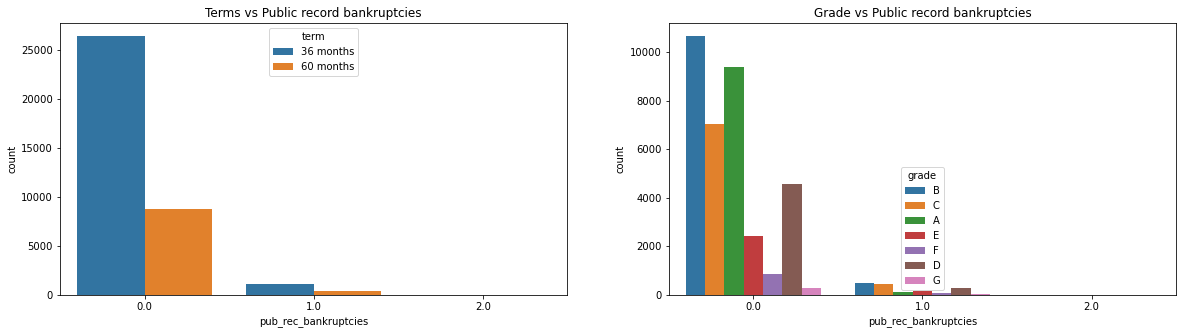

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)
plt.show()

<b>Observation </b>
<ol>
   <li>Borrwers higher public record bankruptcies took loan for 36 months tenure.</li>
<li>We can see the grades are really showing some pattern. 'G' grade people are having less bankruptcies records then other grades.
    Exceptionally B,A graded people are having high pub_rec_bankruptcies.</li>
  </ol>

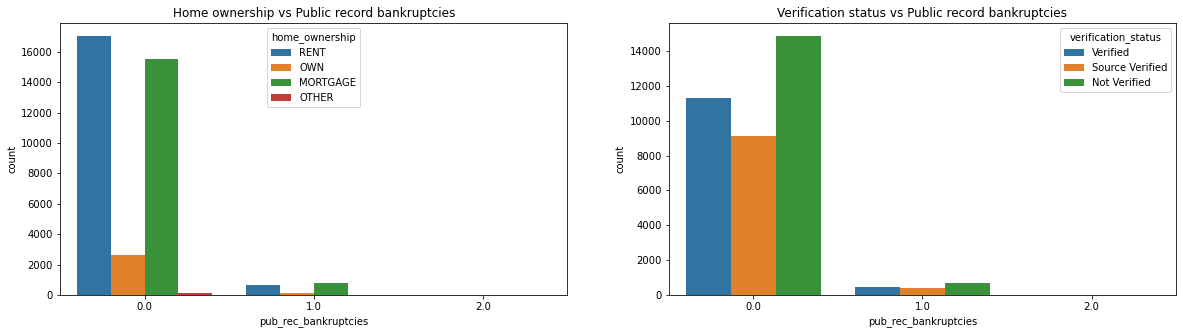

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)
plt.show()

<b>Observation </b> Borrowers with public record bankruptcies are high in MORTGAGE home_ownsership category and also Not-Verified category of verification_status.

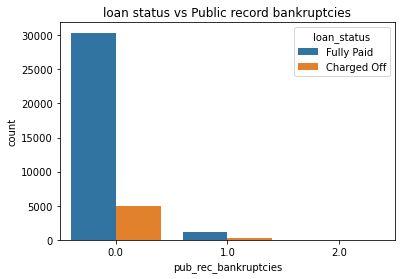

In [96]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')
plt.show()

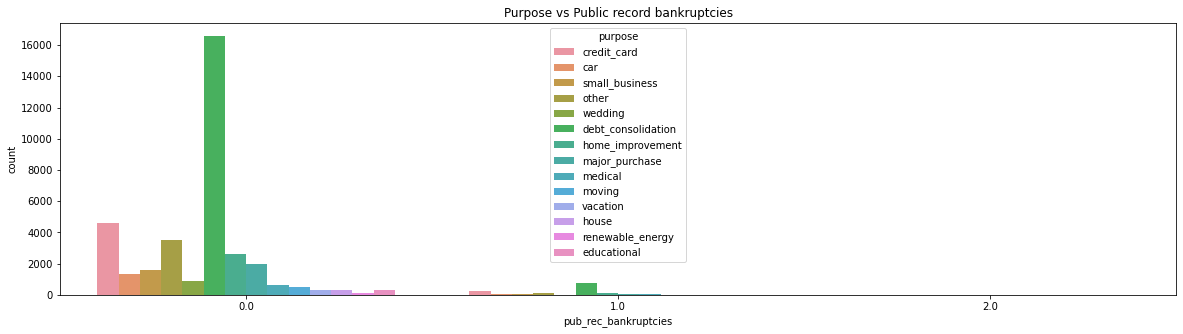

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')
plt.show()

<b> Observation </b> debt_consolidation loan purpose is higer in public record bankruptcies compared to other purposes of loans

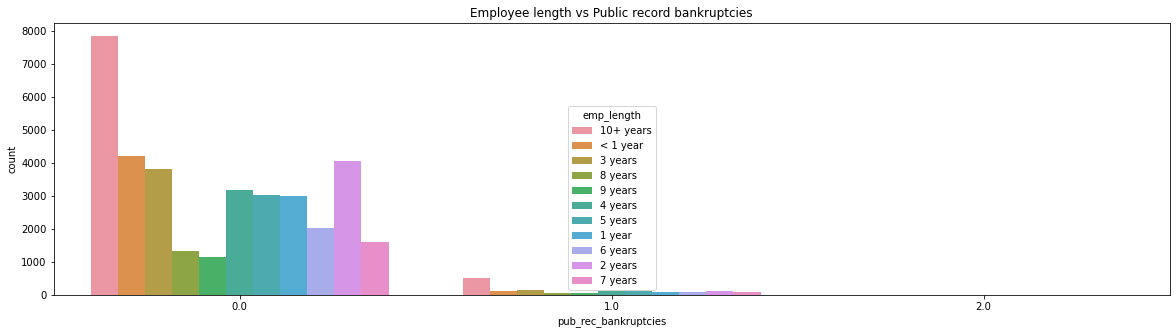

In [98]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')
plt.show()

<b> Observation </b> employe length of 10+ years is higer in public record bankruptcies than the other

<b> inq_last_6mths </b> The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

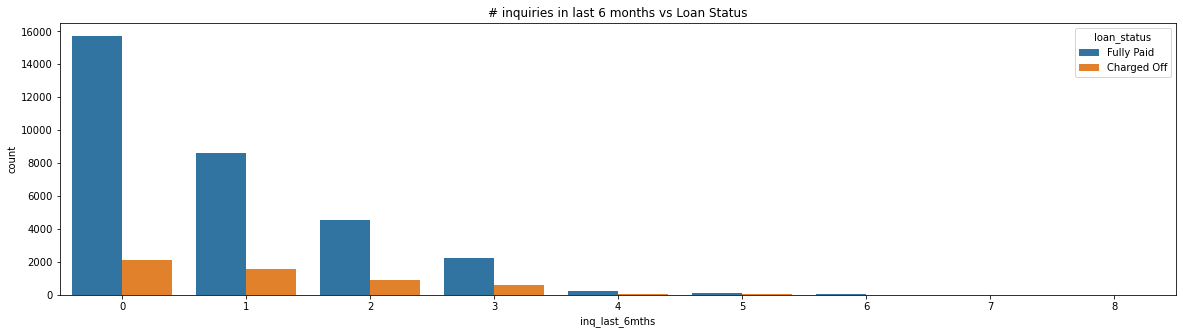

In [99]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

<b> Approval Loan Amount Ratio </b>
<ul>
    <li>emp_length vs Approval Loan Amount Ratio</li>
    <li>Purpose vs Approval Loan Amount Ratio</li>
    <li>Home Ownership vs Approval Loan Amount Ratio</li>
</ul>

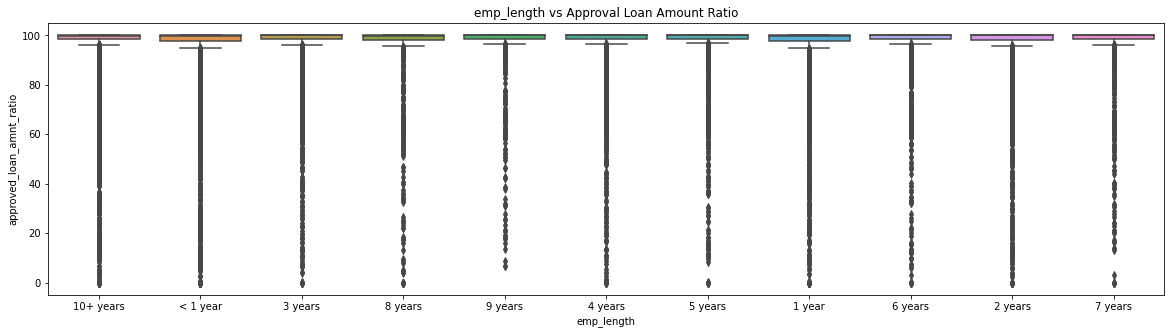

In [100]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.approved_loan_amnt_ratio, data=data)
plt.title('emp_length vs Approval Loan Amount Ratio')
plt.show()

<b> Observation </b> There is not much relation between approval of loan amount ratio and employment length

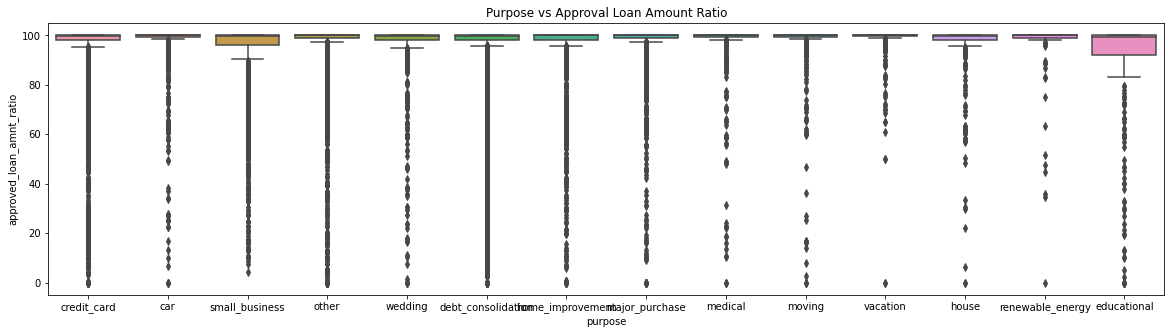

In [101]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Purpose vs Approval Loan Amount Ratio')
plt.show()

<b> Observation </b> The Funded amount by investors is lower than requested loan amount in <i> education and small_business purposes</i>.

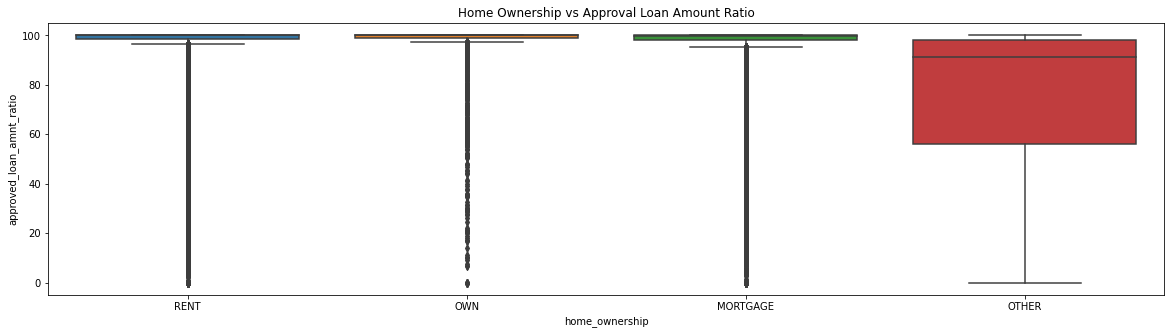

In [102]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Home Ownership vs Approval Loan Amount Ratio')
plt.show()

<b> Observation </b> Borrowers with OTHER home_ownership are having less approved ratio which mean they got less amount than request amount.

<h5> Bivariate Analysis </h5>

<b> Term vs Loan Status </b>

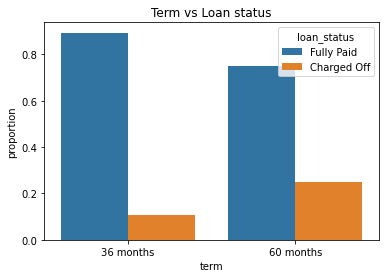

In [103]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Term vs Loan status')
plt.show()

<b> Observation </b> Looks like there are more proportion of borrowers <i> defaulted loan in 60 months term then 36 months </i>. Also the <i> Fully Paid rate is higher in 36 months tenure </i>.

<b> Observation </b> debt_consolidation loan purpose is higer in public record bankruptcies compared to other purposes of loans

<b> Term vs loan amount </b>

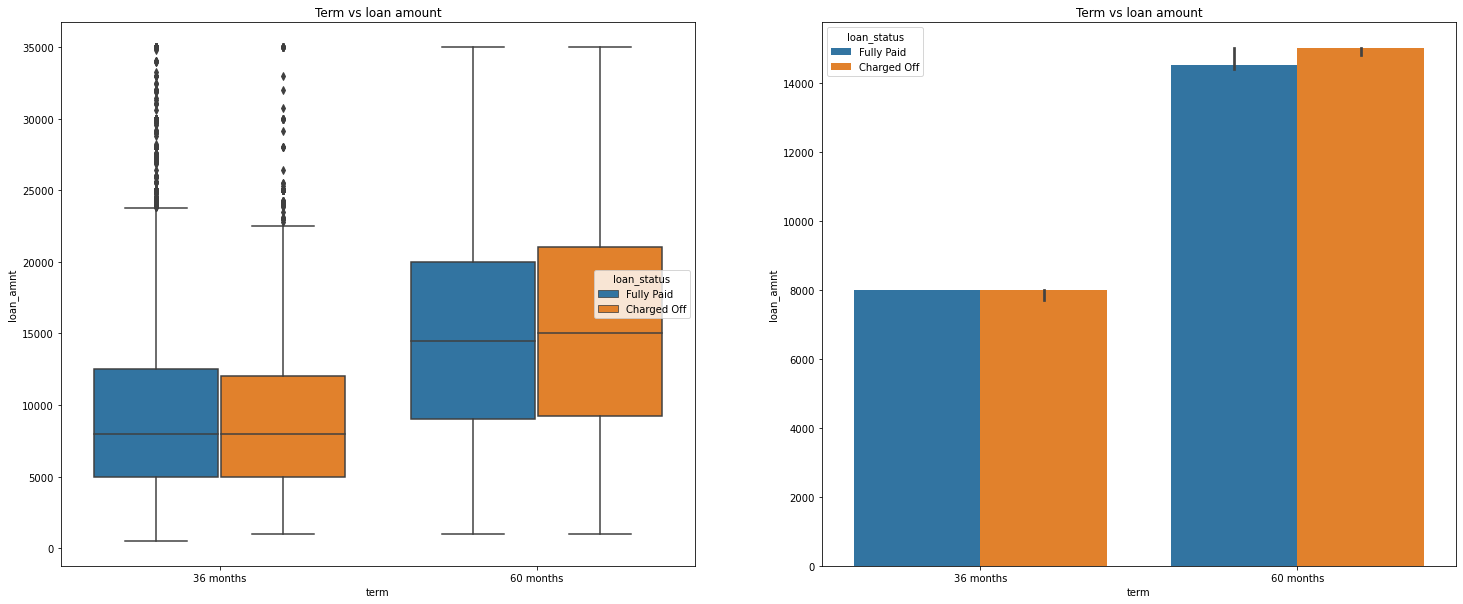

In [104]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

<b> Observation </b>
<ol><li>Loan amount is not a decider for defaults in <i> both 36 adn 60 months</i>.</li>
    <li>Borrowers have equal distribtion is <i>both default and non default for 36 and 60 months</i> tenures.</li></ol>

<b> Term vs Interest rate </b>

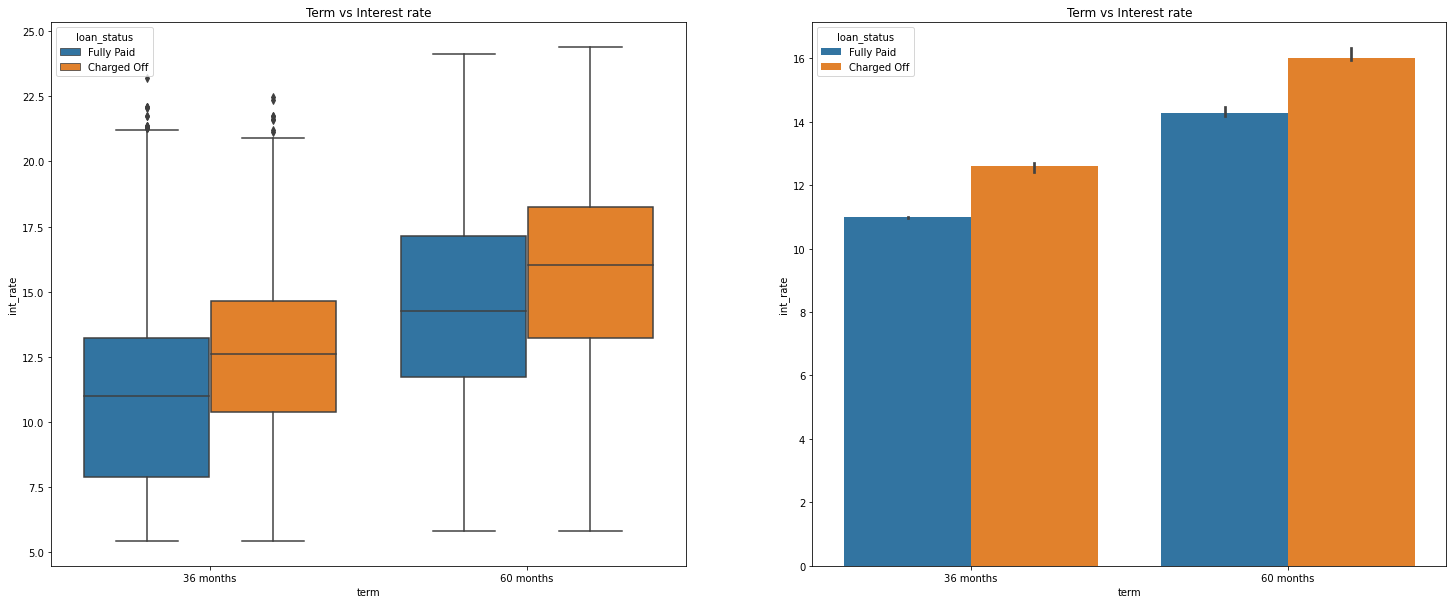

In [105]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

<b> Observation </b> For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

<b> Term vs DTI </b>

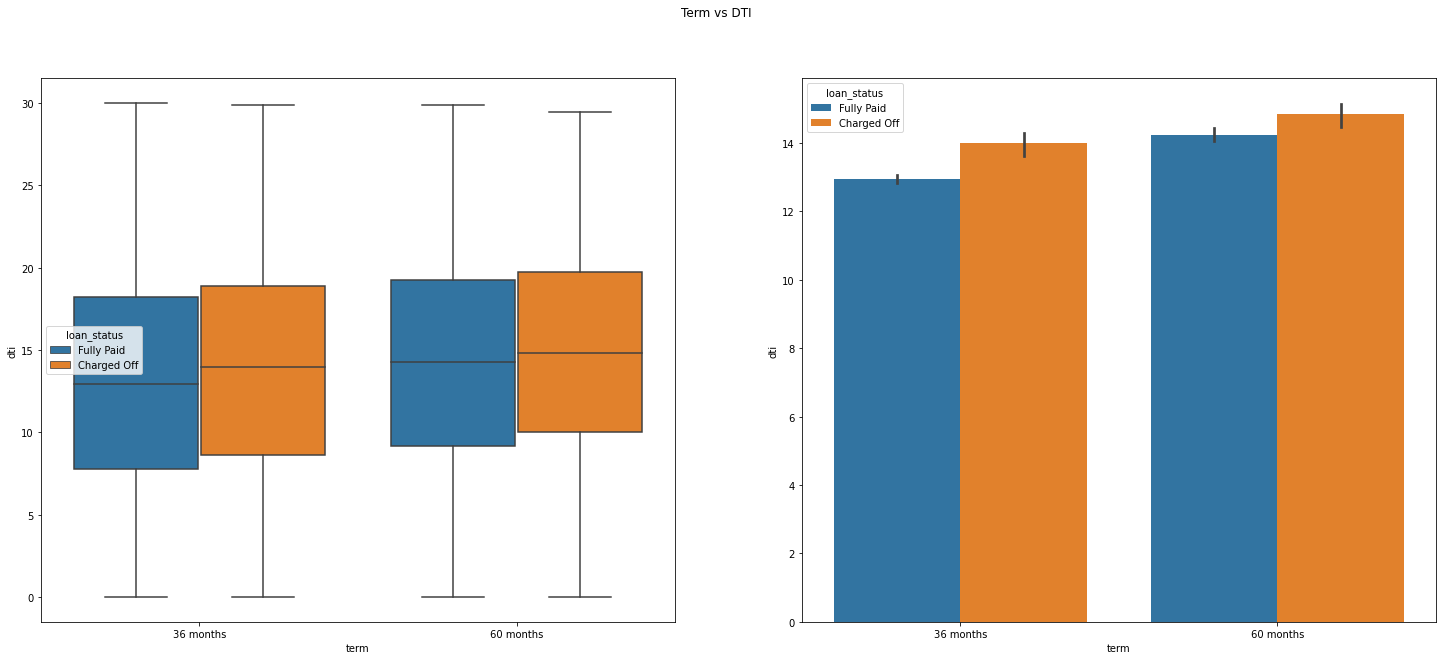

In [106]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

<b> Observation </b> Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

<b> Grade vs Loan status </b>

In [107]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

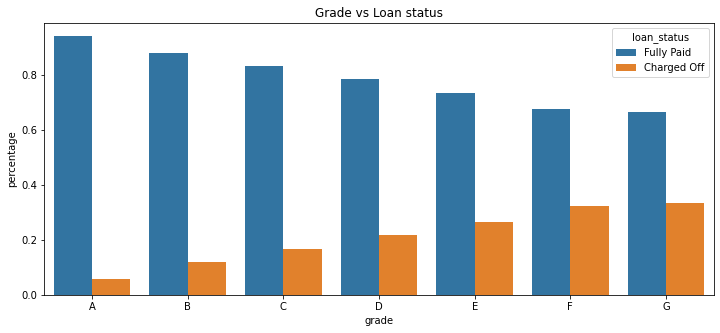

In [108]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')
plt.show()

<b> Observation </b> The above graph clearly says the <i> charged off increases as grades decreases </i>.

<b> Grade vs loan amount </b>

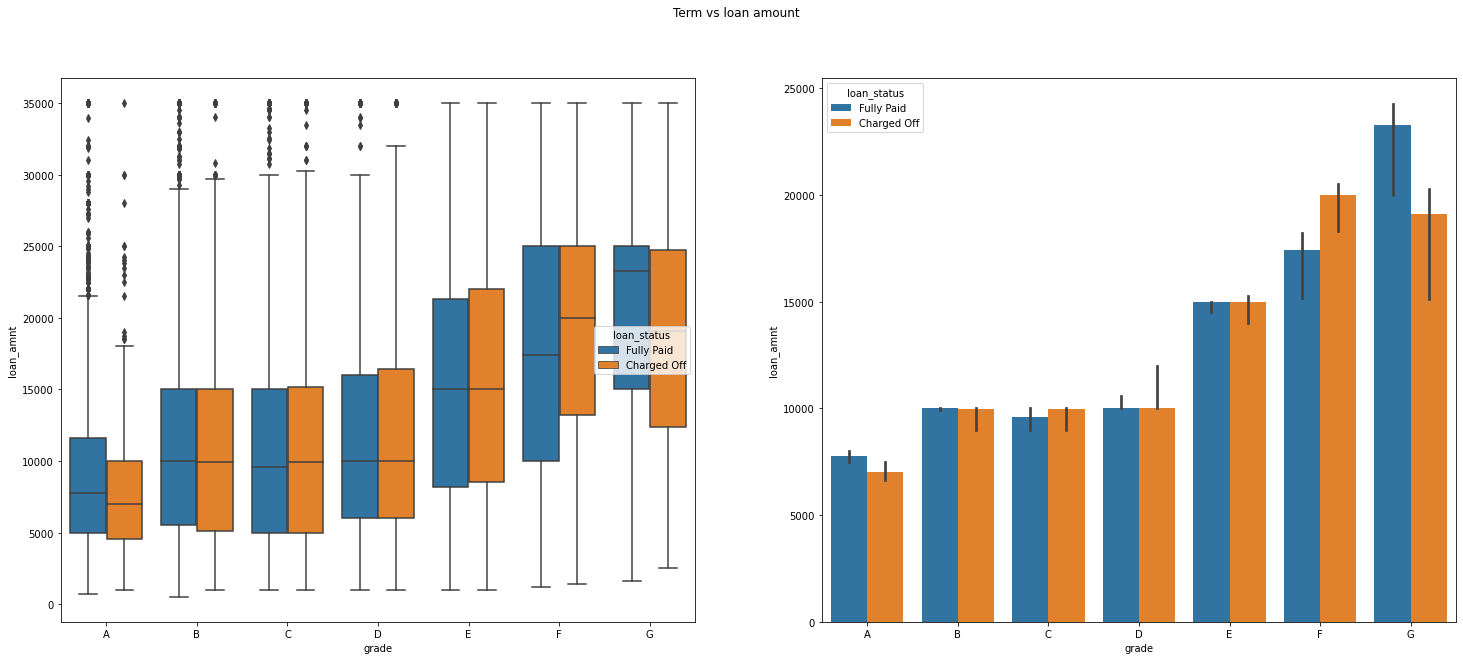

In [109]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

<b> Observation </b>

<ol> <li>For lower grades <i>'F' and 'G' </i>there are more <i>difference between charged-off and fully paid</i>.</li>
    <li>The lower grade people has taken <i>higher amount of loans</i> and also they are <i>more prone to default the loan</i>.</li></ol>

<b> Grade vs Interest Rate</b>

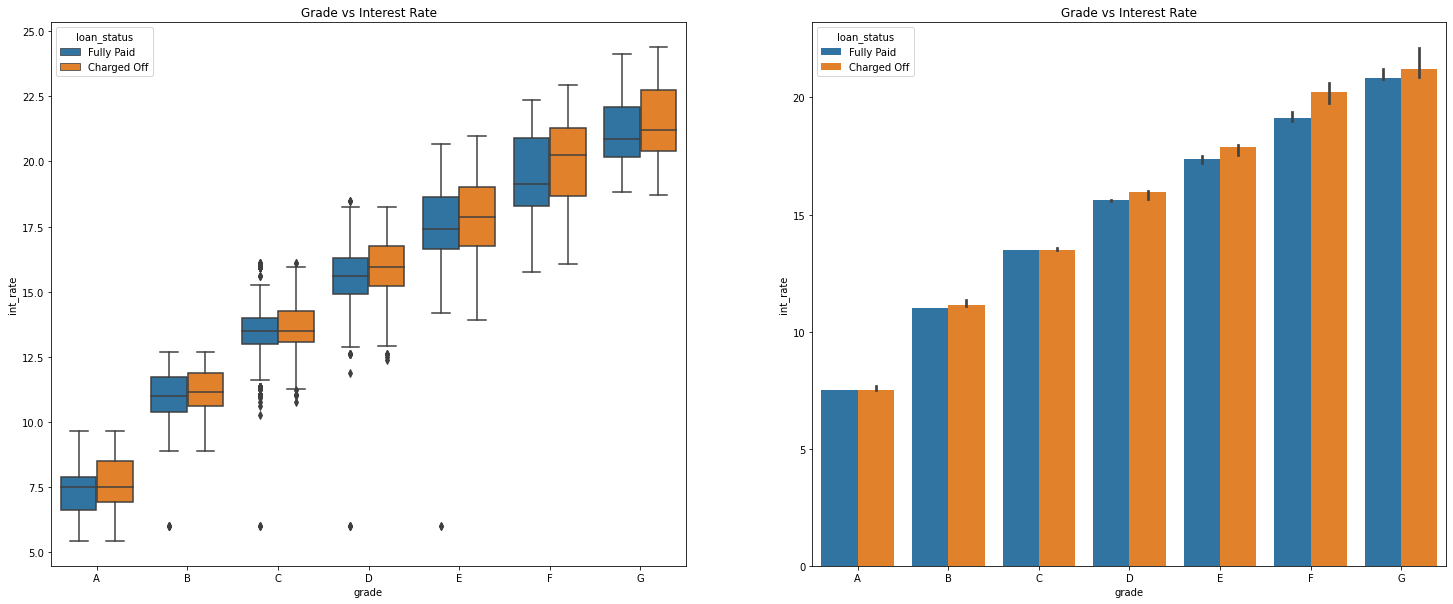

In [110]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

<b>Observation</b>As <i> grade decreases the interest rate gradually increases</i>. and they are more and more prone to default the loan.

<b> Grade vs DTI </b>

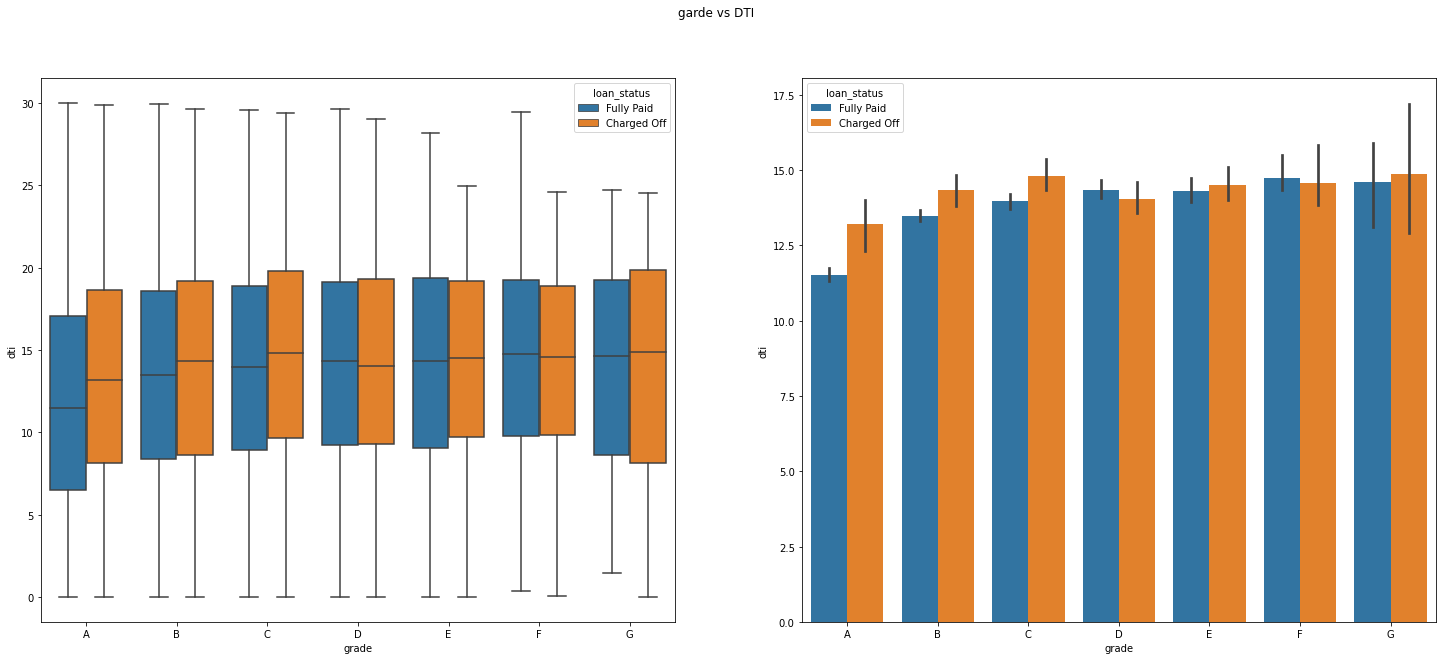

In [111]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

<b> Observation </b> There is not much change in dti in each grade and loan status.

<b> Employment Length vs Loan status </b>

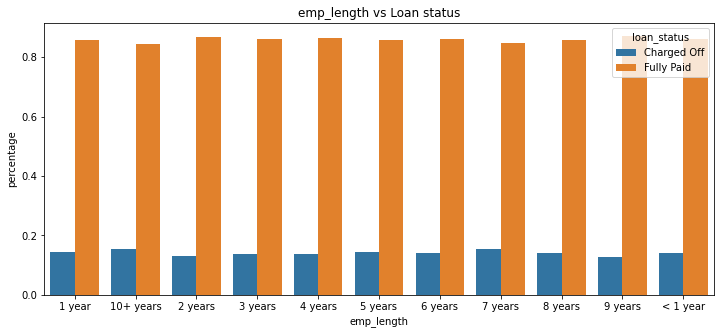

In [112]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('emp_length vs Loan status')
plt.show()

<b> Observation</b>  There is not big changes or pattern observed defaulters across employment lengths.

<b> Employe Length vs Loan amount </b>

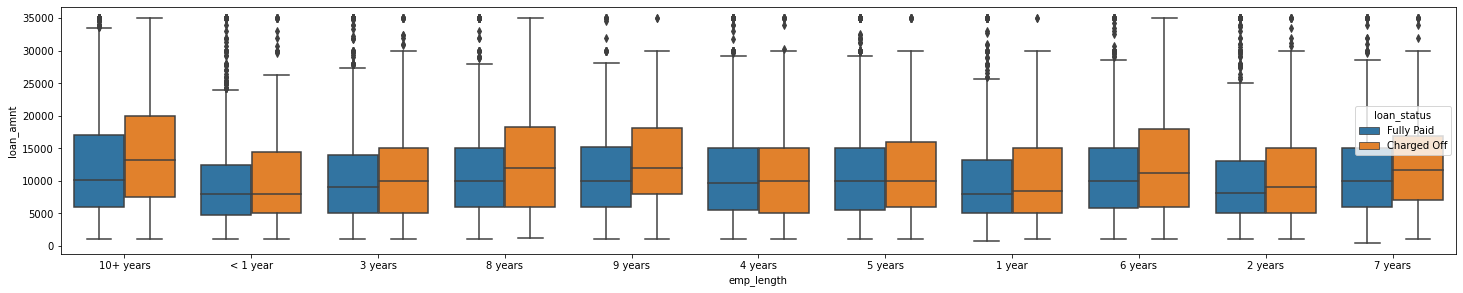

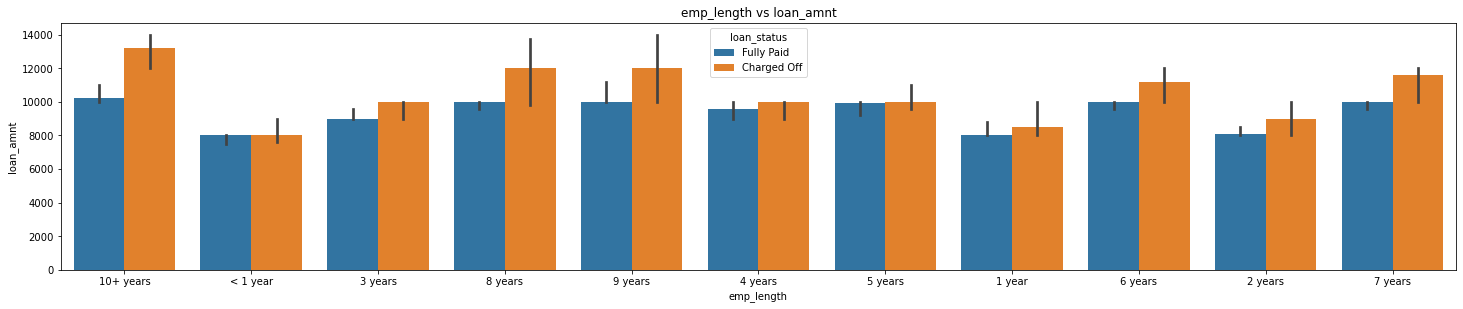

In [113]:
plt.figure(figsize=(25,10))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(25,10))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('emp_length vs loan_amnt')
plt.show()

<b> Observation </b> Borrowers with higher employment lengths and took more loan amounts got more default rate.

<b> Employe length vs interest rate </b>

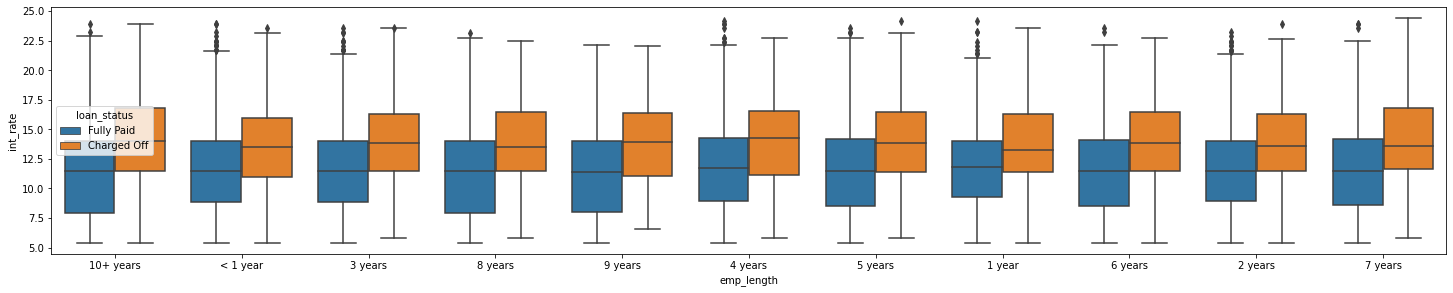

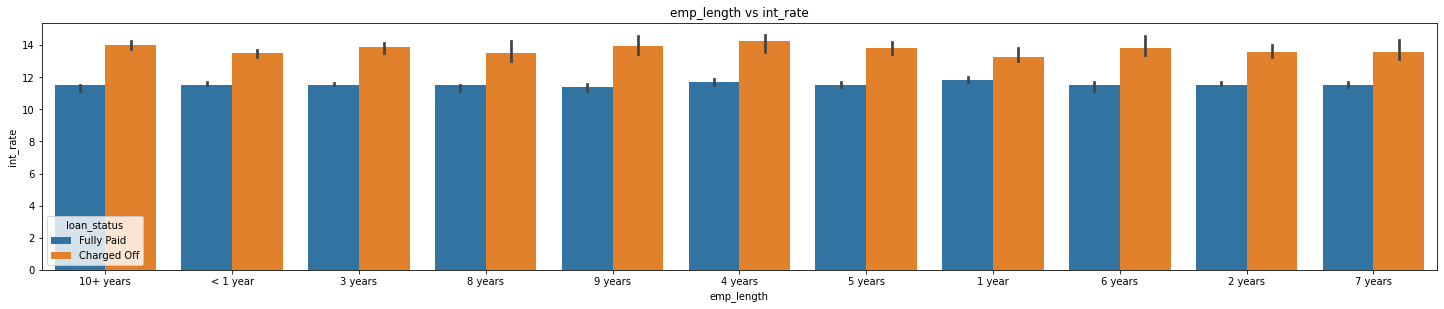

In [114]:
plt.figure(figsize=(25,10))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(25,10))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('emp_length vs int_rate')
plt.show()

<b> Observation </b> Irrespictive of employment length loans with more interest rates got defaulted more.

<b> Employe length vs dti </b>

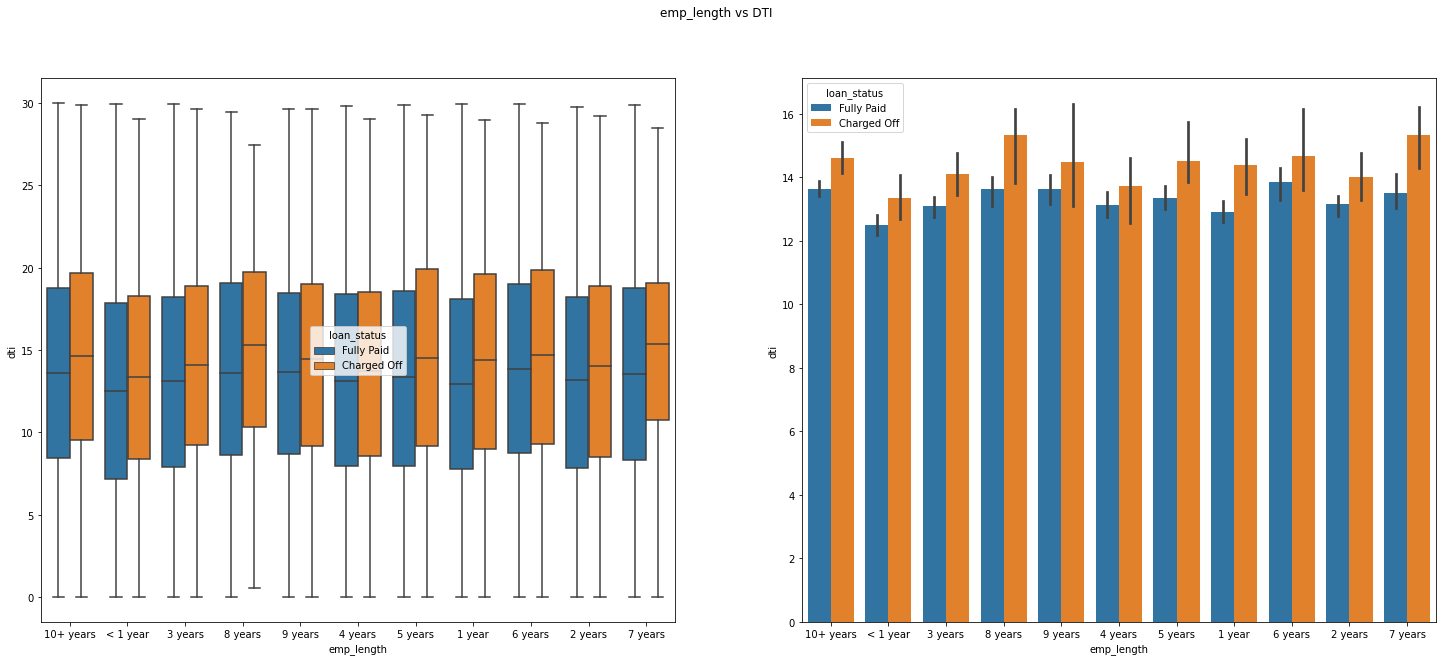

In [115]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

<b> Observation</b> Employment Length and DTI are not showing any patterns towards defaults.

<b> Home Ownership vs Loan status </b>

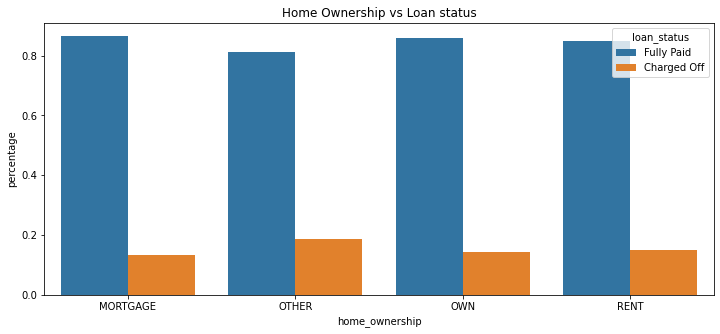

In [116]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')
plt.show()

<b> Observation </b> There is bit high percentage of defaults are recorded in <i>OTHER home_ownership category</i>.

<b> Home Ownership vs Interest Rate </b>

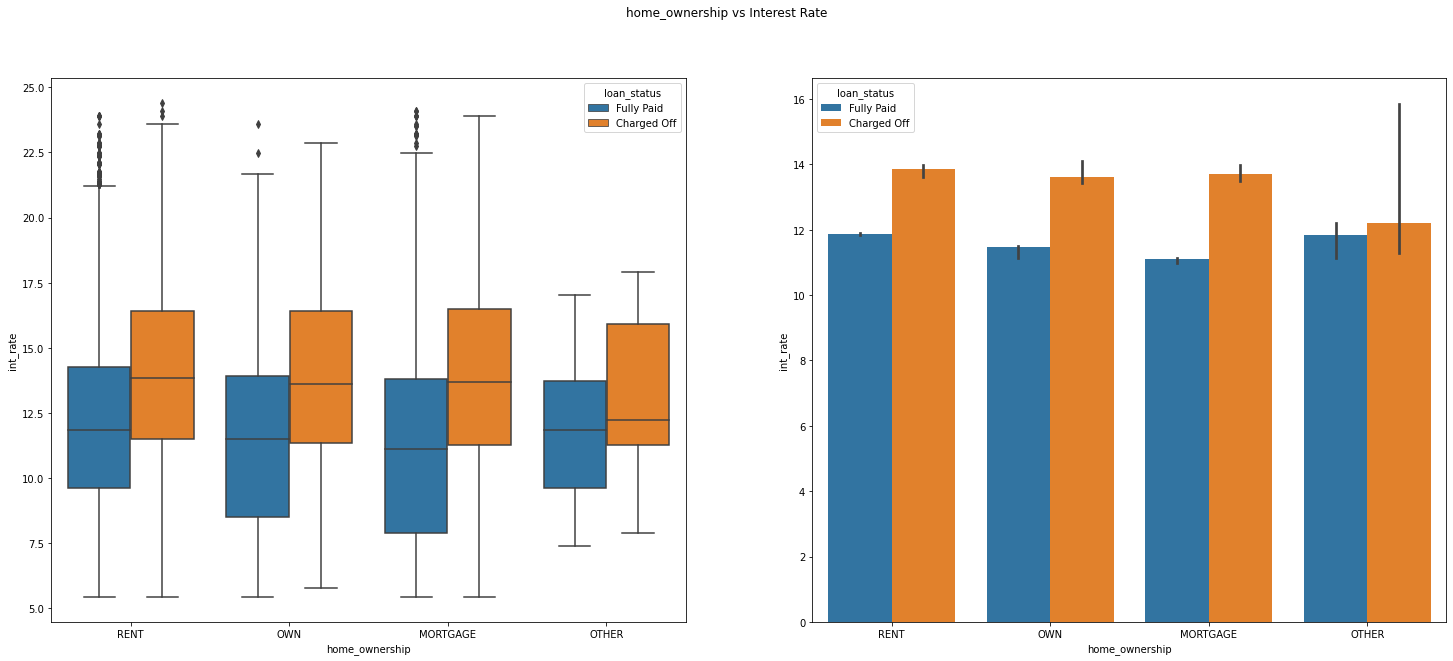

In [117]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

<b> Observation </b> Irrespictive of Home owner ship, when the interest rate is high the dafault rate also high.

<b> Home Ownership vs Loan Amount </b>

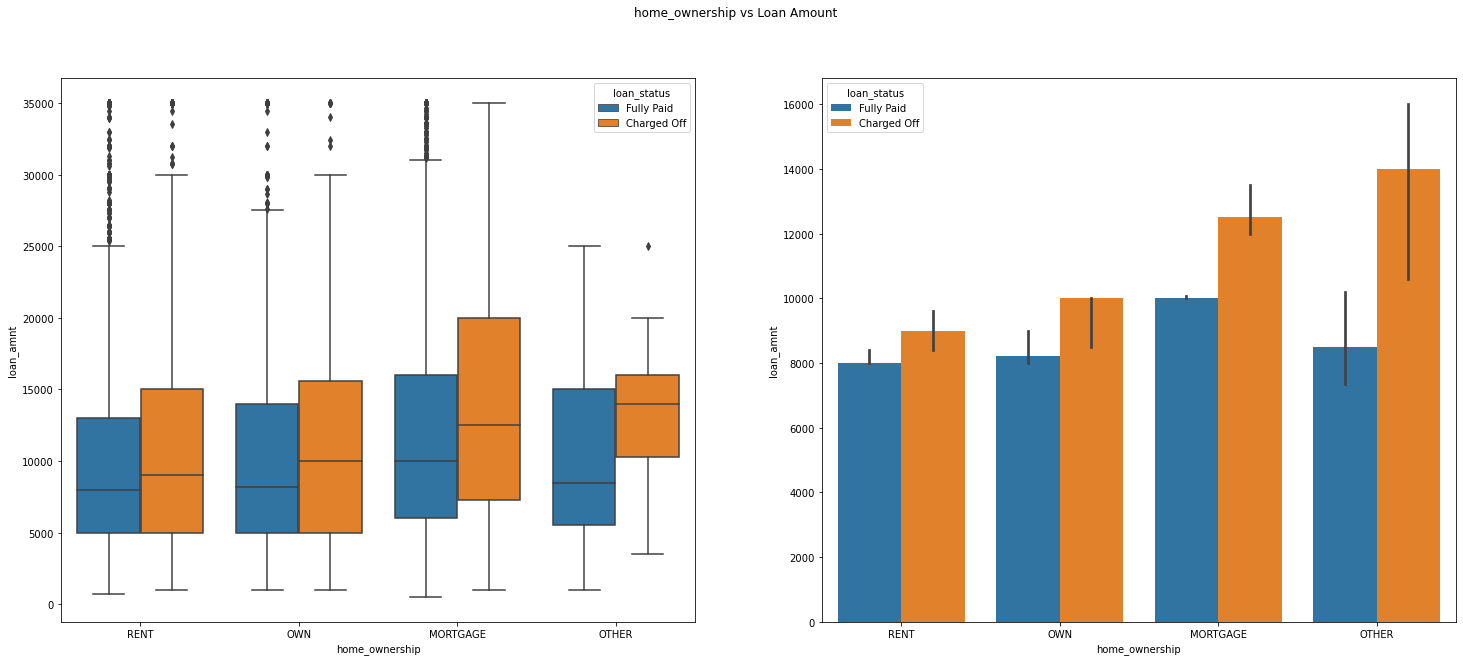

In [118]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs Loan Amount')
plt.show()

<b> Observation </b> Borrowers who took higher loan amounts <i> defaulted more than others</i>.

<b> Home Ownership vs DTI </b>

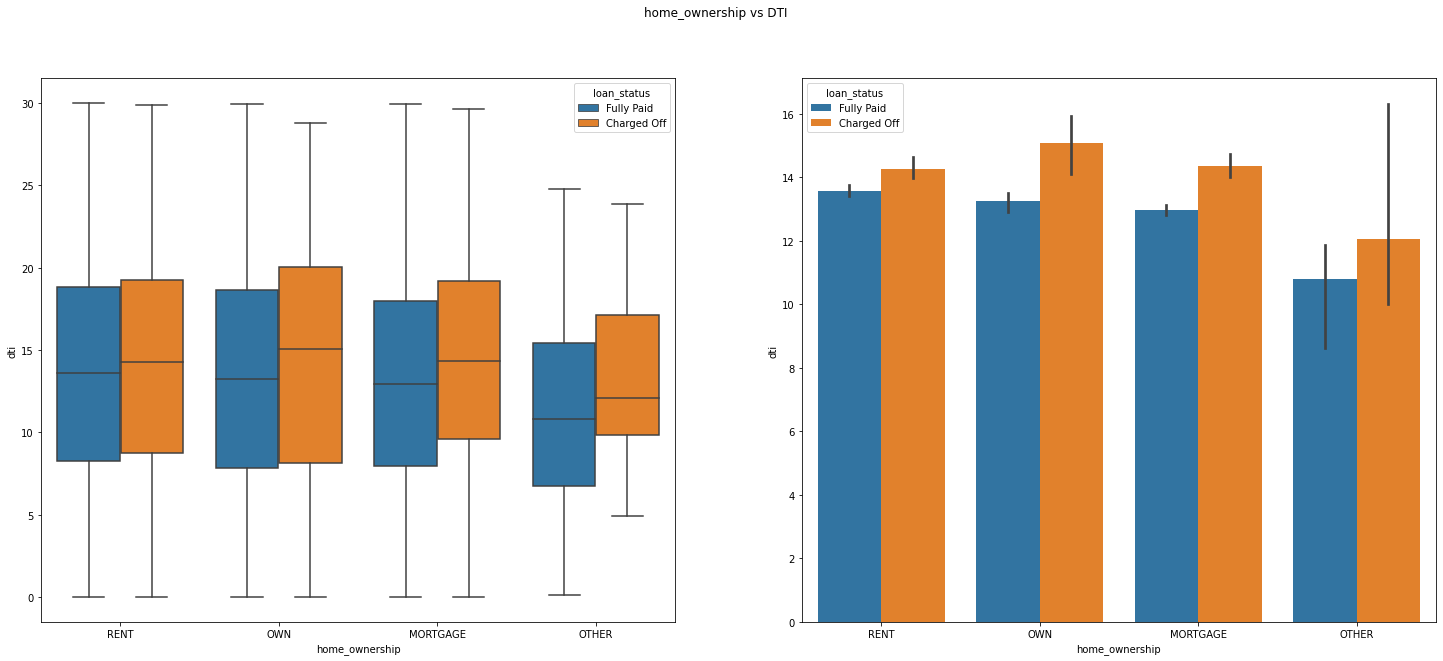

In [119]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

<b> Verification status vs Loan Status </b>

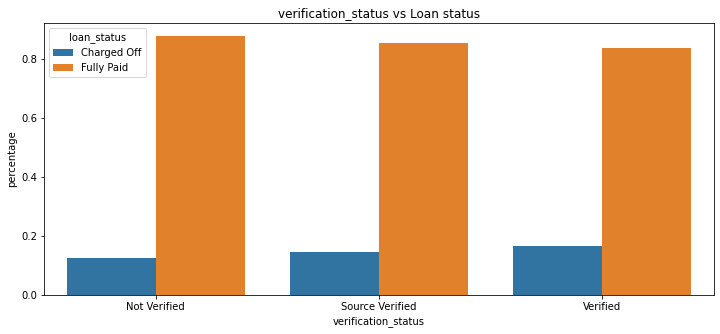

In [120]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('verification_status vs Loan status')
plt.show()

<b> Observation </b> There isn't big change in charged of loans for all verification_status.

<b> Verification Status vs Loan amount </b>

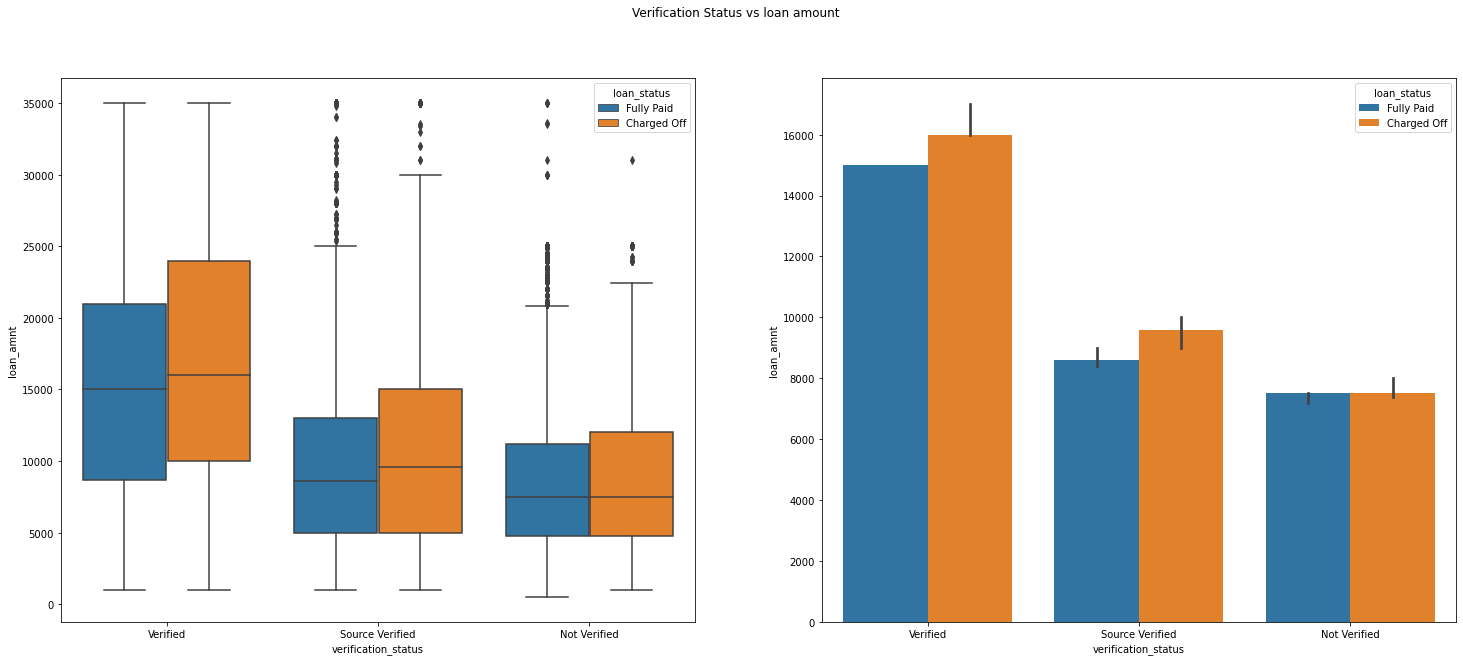

In [121]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

<b>Observation</b>
<ol> <li>Verified loans are given more loan amounts compared to others.</li>
<li> There is a slight increase in loan amount for verified and source verified loan when they are defaulted.</li></ol>

<b> Verification Status vs interest rate </b>

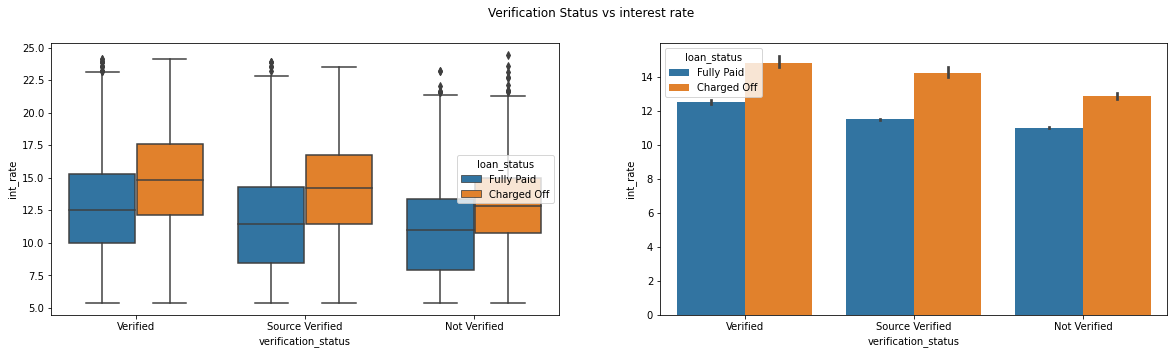

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

<b> Observation </b> Irrespective of verification status higher interest rates are incurring default of loan.

<b> Verification Status vs DTI </b>

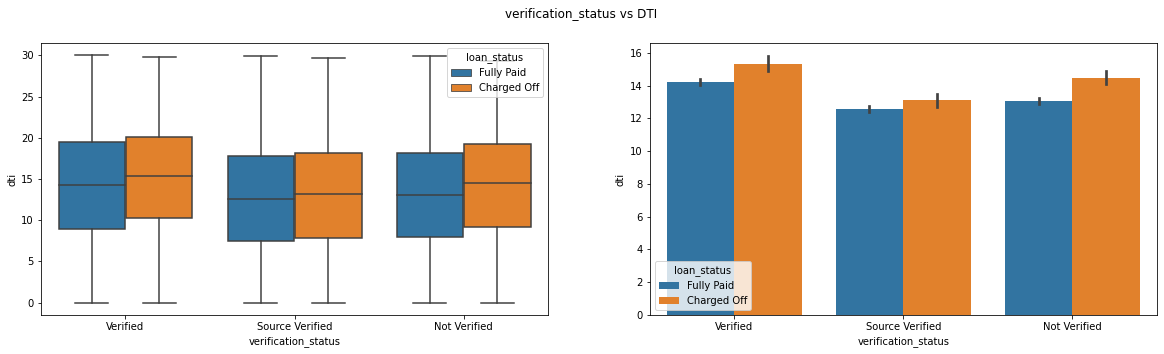

In [123]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

<b> Observation </b> There is slight increase in the dti mean for defaulted laons for all the verification status categories.

<b> Purpose vs Loan status (Charged Off) </b>

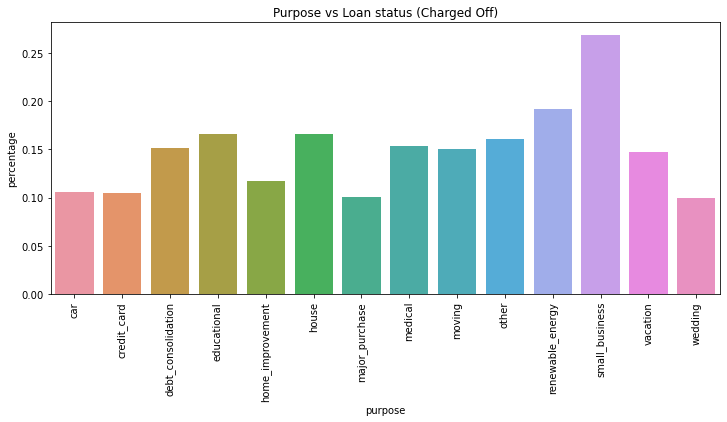

In [124]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

<b> Observation </b> Charged-off are higher for small_business comparitively.

<b> Purpose vs Loan Amount for Loan status(Charged Off) </b>

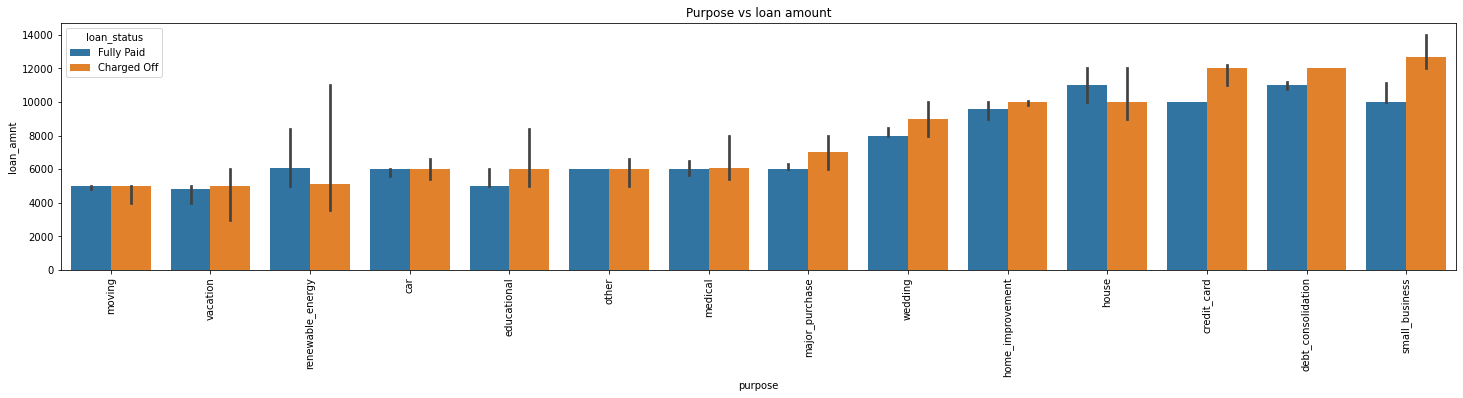

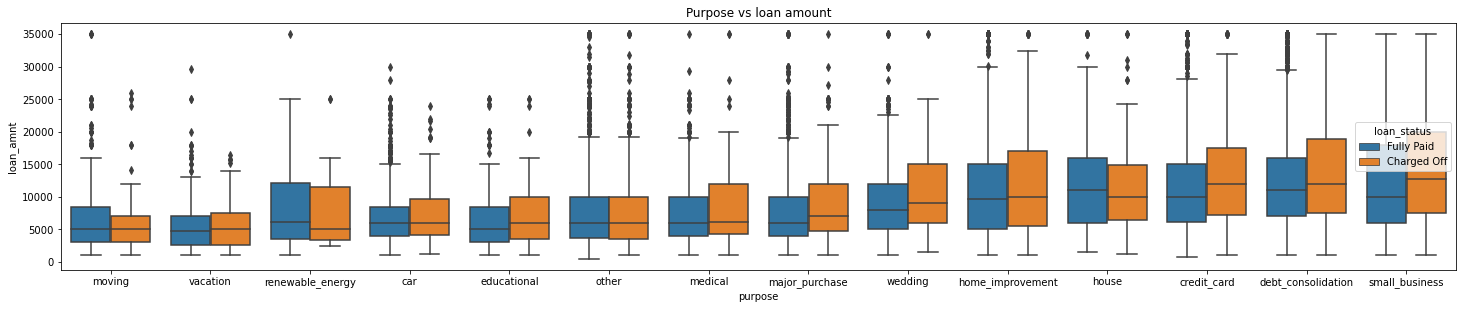

In [125]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.figure(figsize=(25,10))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off']
            .sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Purpose vs loan amount')
plt.figure(figsize=(25,10))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off']
            .sort_values(by='loan_amnt').purpose)
plt.title('Purpose vs loan amount')
plt.show()

<b> Observation </b> small_business has more defaults when the loan amount is also high.

<b> Purpose vs Interest Rate for Loan status(Charged Off) </b>

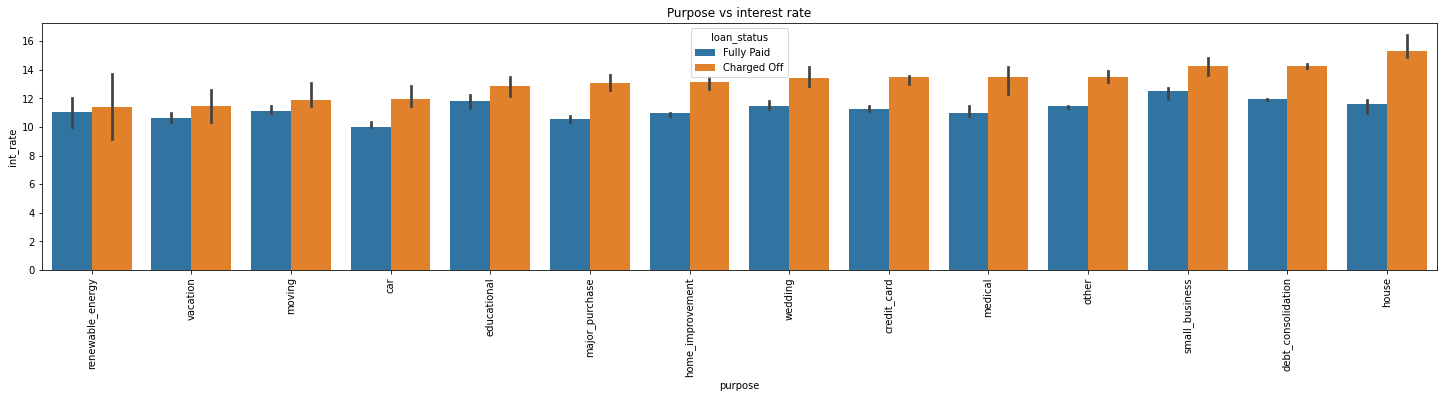

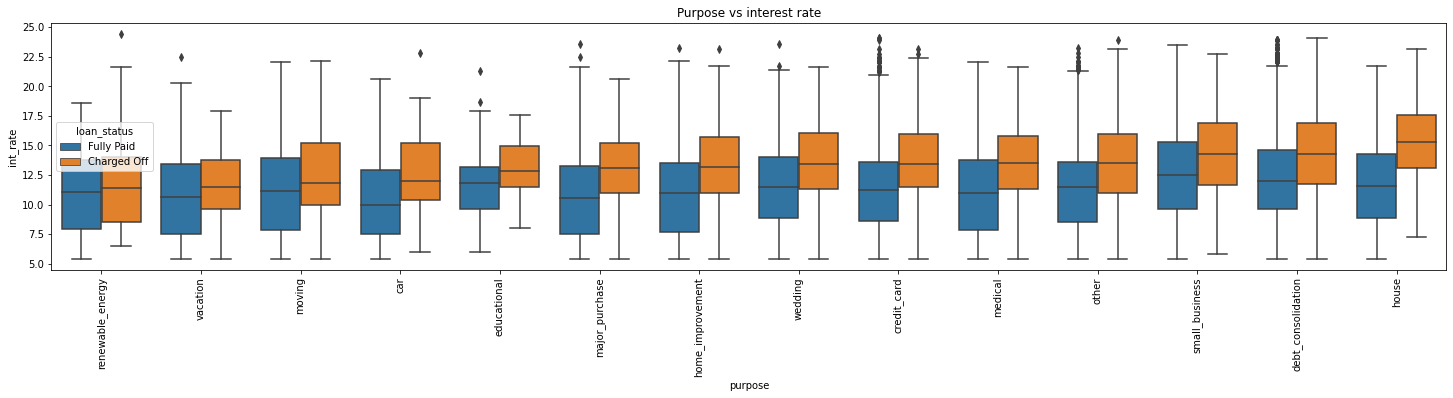

In [126]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.figure(figsize=(25,10))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.title('Purpose vs interest rate')

plt.xticks(rotation=90)

plt.figure(figsize=(25,10))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.title('Purpose vs interest rate')

plt.xticks(rotation=90)
plt.show()

<b> Observation </b> Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

<b> Purpose vs dti for Loan status(Charged Off) </b>

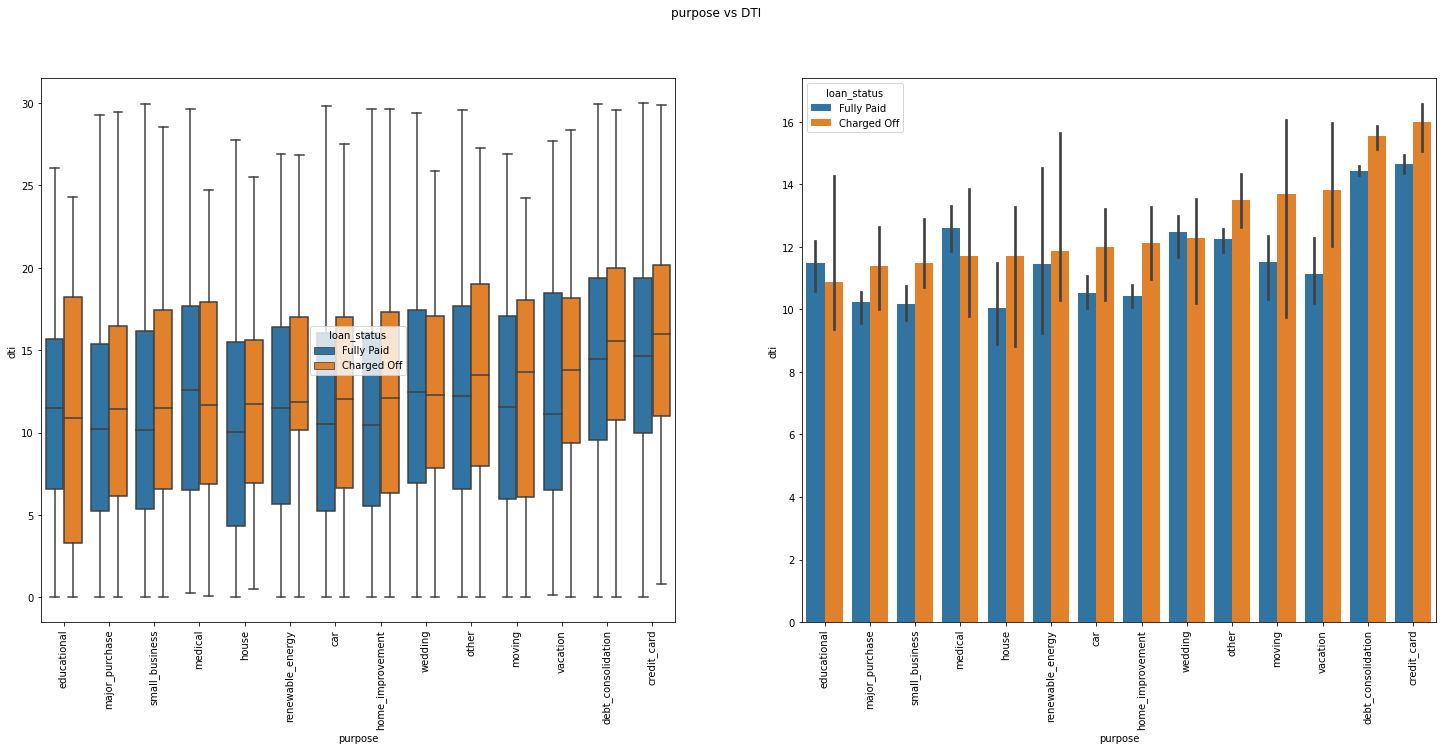

In [127]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(25,10))
plt.suptitle('purpose vs DTI')

plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

<b> Observation </b> Could not observe any pattern from the charts

<b> Loan Amount vs Interest Rate </b>

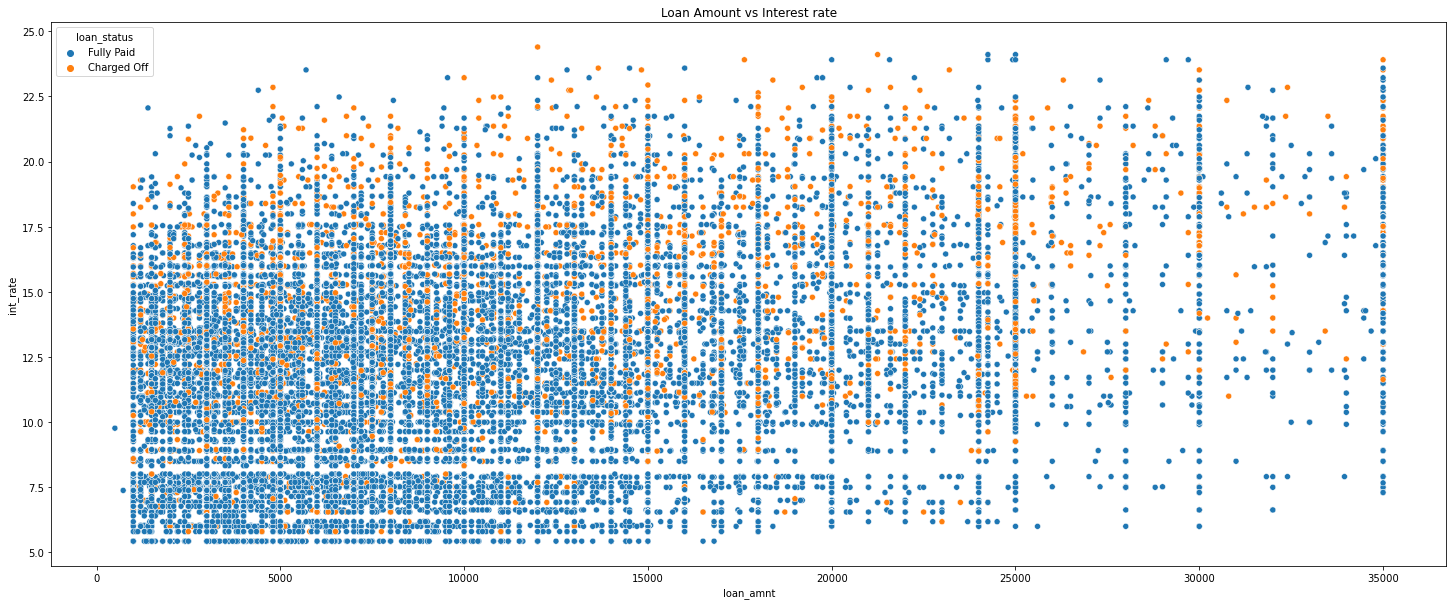

In [128]:
plt.figure(figsize=(25,10))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Interest rate')
plt.show()

<b> Observartion </b> Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

<b> Loan Amount vs Annual income </b>

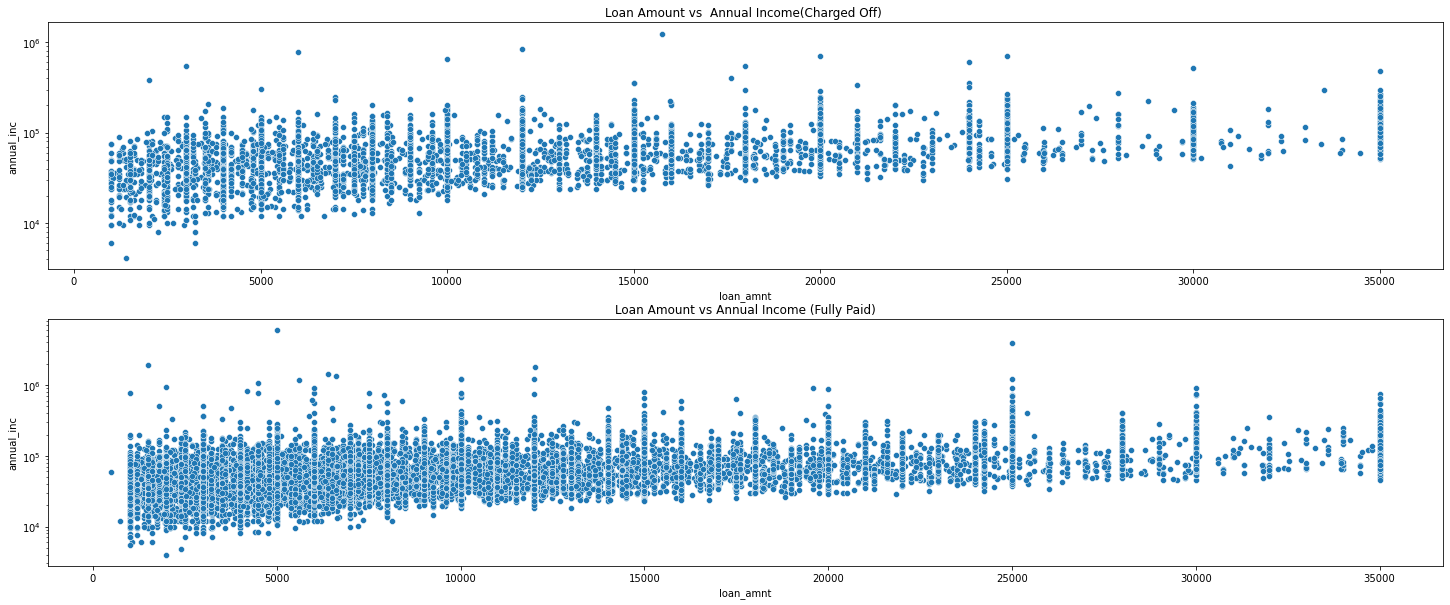

In [129]:
plt.figure(figsize=(25,10))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs  Annual Income(Charged Off) ')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Annual Income (Fully Paid)')
plt.show()

<b>Observation</b> Both Fully paid and Charged Off loans are <i>having similar pattern versus Annual income</i>. We can fit a linear pattern with a line which has very much less slope.

<b> Loan Amount vs DTI </b>

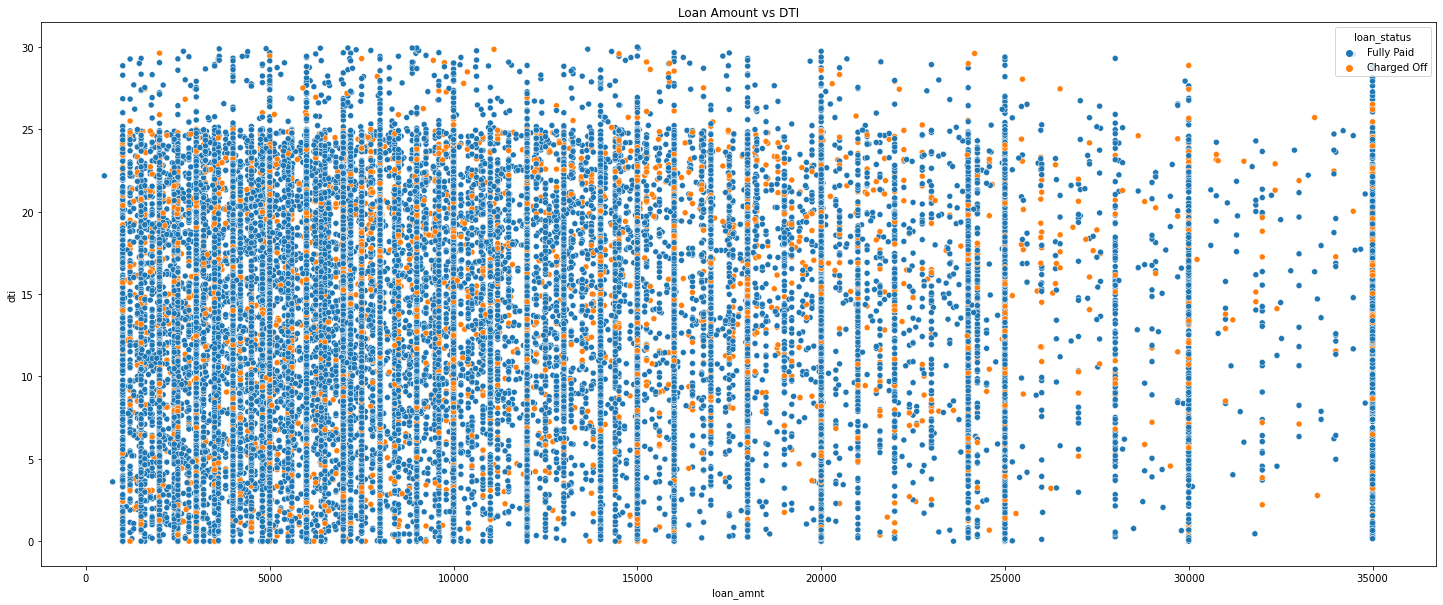

In [130]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='loan_amnt', y='dti', data=data, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

<b> Observartion </b>Values are pretty much spread accross all the space. There is <i>no specific pattern found</i> in the spread.

<b> Interest Rate vs DTI </b>

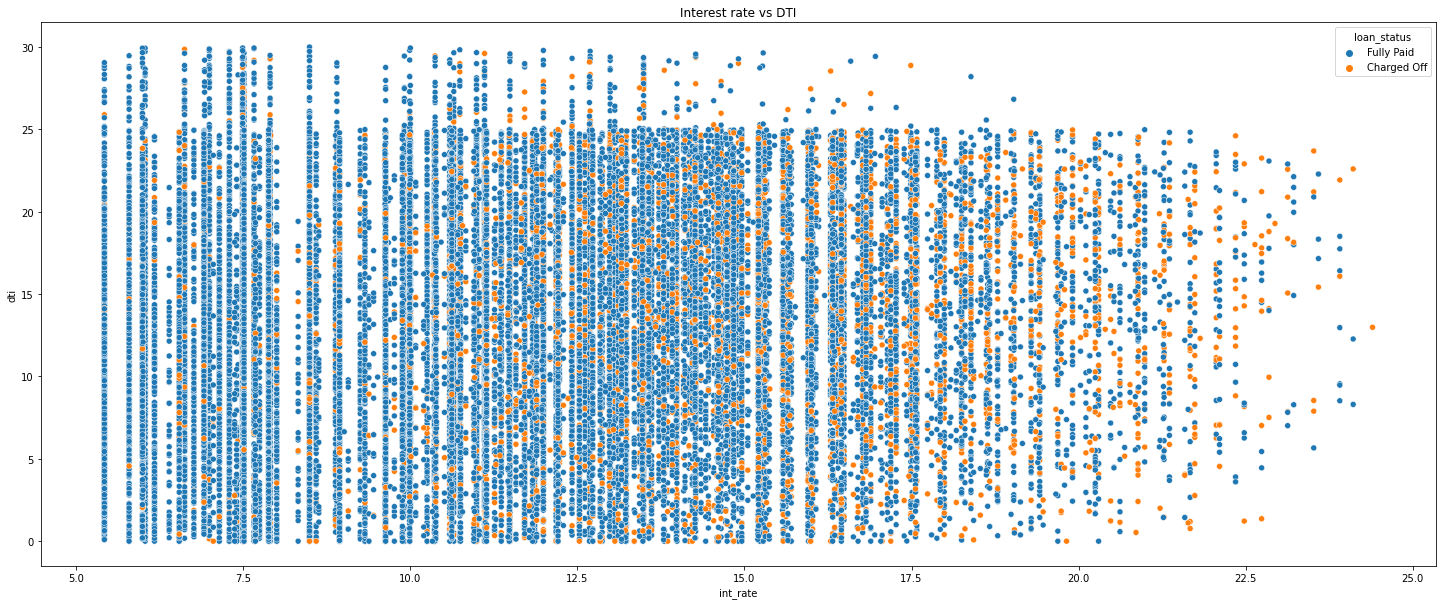

In [131]:
plt.figure(figsize=(25,10))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

<b> Observation </b> Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

<h5> Correlation Matrix </h5>

Let's find the correlation between the variables/columns of out data set.

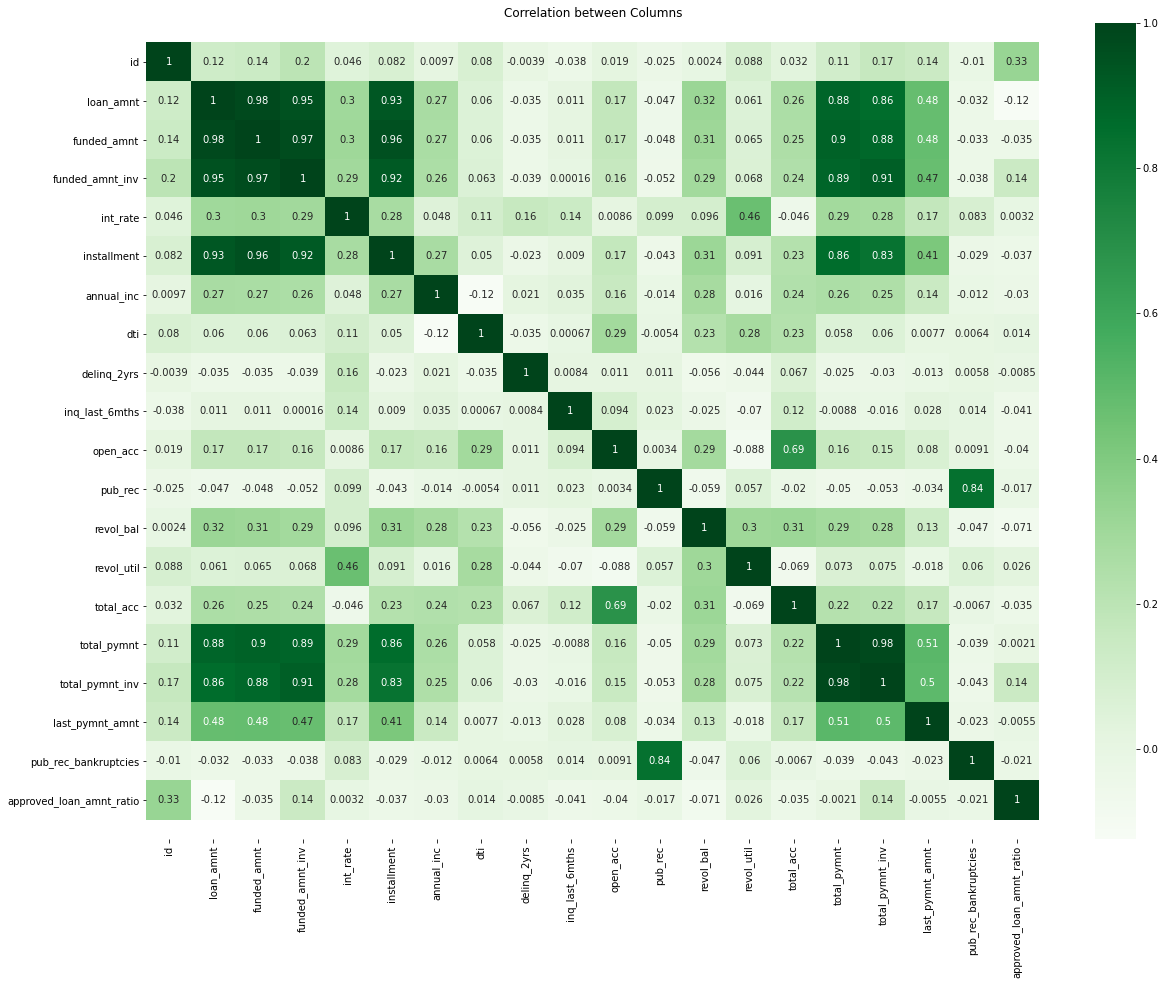

In [132]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,15))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

<b> Observation </b>
<ol><li>
    The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.</li>
    <li>Interest rates are high for people with high revol utilisation.</li></ol>

<b> Conclusion <b>

<ol>
<li>Lending club should reduce the high level intrest loan for 60 months tenure, they are prone to loan default.</li>
<li>Grades are good metric for detecting defaulters. lending club should examine more information from borrower before issuing loans to low grade (G to A) </li>
<li>Small business loans are defaulted more.Lending club should stop/reduce issuing the loans to them. </li>
<li>People with more no.of public derogatory records are having more chance of filing a bankruptcy.Lending club should make sure there are no public derogatory record for borrower.</li>
</ol>